# Import data

In [5]:
import pandas as pd
from sklearn import *
import sklearn
from sklearn.preprocessing import *
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns 

le = LabelEncoder()


In [2]:
df = pd.read_csv('caged_completo.csv')
df.shape

(15466, 41)

In [3]:
df

,ano,mes,sigla_uf,id_municipio,id_municipio_6,admitidos_desligados,tipo_estabelecimento,tipo_movimentacao_desagregado,faixa_emprego_inicio_janeiro,tempo_emprego,...,regiao_administrativas_df,regiao_administrativas_rj,regiao_administrativas_sp,regiao_corede,regiao_corede_04,regiao_gov_sp,regiao_senac_pr,regiao_senai_pr,regiao_senai_sp,subregiao_senai_pr
0,2007,12,SP,3535507,353550,2,3,11,9,7.0,...,0.0,NaN,7,NaN,99,035,99,NaN,26.0,99.0
1,2007,12,SP,3539301,353930,2,3,11,6,8.0,...,0.0,NaN,4,NaN,99,017,99,NaN,4.0,99.0
2,2007,12,SP,3522703,352270,1,3,2,1,0.0,...,0.0,NaN,5,NaN,99,039,99,NaN,27.0,99.0
3,2007,12,SP,3506102,350610,2,3,4,5,5.0,...,0.0,NaN,2,NaN,99,041,99,NaN,37.0,99.0
4,2007,12,SP,3506102,350610,2,3,4,5,5.0,...,0.0,NaN,2,NaN,99,041,99,NaN,37.0,99.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15461,2011,6,DF,5300108,530010,1,1,2,1,0.0,...,1.0,NaN,999,NaN,99,999,99,NaN,999.0,99.0
15462,2011,6,DF,5300108,530010,2,1,6,6,4.0,...,18.0,NaN,999,NaN,99,999,99,NaN,999.0,99.0
15463,2013,8,MA,2103406,210340,1,1,2,7,0.0,...,0.0,NaN,999,NaN,99,999,99,NaN,999.0,99.0
15464,2015,10,MA,2101400,210140,1,3,2,3,0.0,...,0.0,NaN,999,NaN,99,999,99,NaN,999.0,99.0


In [4]:
df.columns

Index(['ano', 'mes', 'sigla_uf', 'id_municipio', 'id_municipio_6',
       'admitidos_desligados', 'tipo_estabelecimento',
       'tipo_movimentacao_desagregado', 'faixa_emprego_inicio_janeiro',
       'tempo_emprego', 'quantidade_horas_contratadas', 'salario_mensal',
       'saldo_movimentacao', 'indicador_aprendiz',
       'indicador_trabalho_intermitente', 'indicador_trabalho_parcial',
       'indicador_portador_deficiencia', 'tipo_deficiencia', 'cbo_2002',
       'cnae_1', 'cnae_2', 'cnae_2_subclasse', 'grau_instrucao', 'idade',
       'sexo', 'raca_cor', 'subsetor_ibge', 'bairros_sp', 'bairros_fortaleza',
       'bairros_rj', 'distritos_sp', 'regiao_administrativas_df',
       'regiao_administrativas_rj', 'regiao_administrativas_sp',
       'regiao_corede', 'regiao_corede_04', 'regiao_gov_sp', 'regiao_senac_pr',
       'regiao_senai_pr', 'regiao_senai_sp', 'subregiao_senai_pr'],
      dtype='object')

In [5]:
df_ajustes = pd.read_csv('caged_antigos_ajustes.csv')
df_ajustes.shape

(14774, 43)

In [6]:
df_ajustes.columns

Index(['ano', 'mes', 'competencia_movimentacao', 'sigla_uf', 'id_municipio',
       'id_municipio_6', 'admitidos_desligados', 'tipo_estabelecimento',
       'tipo_movimentacao_desagregado', 'faixa_emprego_inicio_janeiro',
       'tempo_emprego', 'quantidade_horas_contratadas', 'salario_mensal',
       'saldo_movimentacao', 'indicador_aprendiz',
       'indicador_trabalho_intermitente', 'indicador_trabalho_parcial',
       'indicador_portador_deficiencia', 'tipo_deficiencia', 'cbo_1994',
       'cbo_2002', 'cnae_1', 'cnae_2_subclasse', 'grau_instrucao', 'idade',
       'sexo', 'raca_cor', 'subsetor_ibge', 'bairros_sp', 'bairros_fortaleza',
       'bairros_rj', 'distritos_sp', 'regiao_administrativas_df',
       'regiao_administrativas_rj', 'regiao_administrativas_sp',
       'regiao_corede', 'regiao_corede_04', 'regiao_gov_sp', 'regiao_senac_pr',
       'regiao_senai_pr', 'regiao_senai_sp', 'subregiao_senai_pr',
       'regiao_metropolitana_mte'],
      dtype='object')

In [7]:
df_mov = pd.read_csv('caged_movimentacao.csv')
df_mov

,ano,mes,sigla_uf,id_municipio,id_municipio_6,cnae_2_secao,cnae_2_subclasse,cbo_2002,saldo_movimentacao,categoria,...,tipo_empregador,tipo_estabelecimento,tipo_movimentacao,tipo_deficiencia,indicador_trabalho_intermitente,indicador_trabalho_parcial,tamanho_estabelecimento_janeiro,indicador_aprendiz,origem_informacao,indicador_fora_prazo
0,2021,10,MS,5004403,500440,C,1052000,414105,1,101,...,0,1,97,0,0,0,4,0,1,0
1,2021,10,MS,5002704,500270,F,4221902,715615,-1,101,...,0,1,40,0,0,0,8,0,1,0
2,2021,10,MS,5002704,500270,G,4731800,521135,1,101,...,0,1,97,0,0,0,5,0,1,0
3,2021,10,MS,5003801,500380,C,1092900,411005,-1,101,...,0,1,31,0,0,1,1,0,1,0
4,2021,10,MS,5002704,500270,A,151201,641015,-1,101,...,2,3,31,0,0,0,99,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24825,2020,8,ES,3205200,320520,G,4752100,313315,-1,101,...,0,1,43,0,0,0,4,0,1,0
24826,2020,8,ES,3205309,320530,M,7120100,411010,-1,101,...,0,1,40,0,0,0,5,0,1,0
24827,2020,8,ES,3202405,320240,G,4711302,411005,-1,101,...,0,1,31,0,0,0,4,0,1,0
24828,2020,8,ES,3203320,320332,G,4781400,521110,-1,999,...,0,1,40,0,0,0,1,0,2,0


In [8]:
df_mov.columns

Index(['ano', 'mes', 'sigla_uf', 'id_municipio', 'id_municipio_6',
       'cnae_2_secao', 'cnae_2_subclasse', 'cbo_2002', 'saldo_movimentacao',
       'categoria', 'grau_instrucao', 'idade', 'horas_contratuais', 'raca_cor',
       'sexo', 'salario_mensal', 'tipo_empregador', 'tipo_estabelecimento',
       'tipo_movimentacao', 'tipo_deficiencia',
       'indicador_trabalho_intermitente', 'indicador_trabalho_parcial',
       'tamanho_estabelecimento_janeiro', 'indicador_aprendiz',
       'origem_informacao', 'indicador_fora_prazo'],
      dtype='object')

In [9]:
df_mov_prazo = pd.read_csv('caged_movimentacao_fora_prazo.csv')
df_mov_prazo.shape

(24764, 26)

In [10]:
df_mov_prazo.columns

Index(['ano', 'mes', 'sigla_uf', 'id_municipio', 'id_municipio_6',
       'cnae_2_secao', 'cnae_2_subclasse', 'cbo_2002', 'saldo_movimentacao',
       'categoria', 'grau_instrucao', 'idade', 'horas_contratuais', 'raca_cor',
       'sexo', 'salario_mensal', 'tipo_empregador', 'tipo_estabelecimento',
       'tipo_movimentacao', 'tipo_deficiencia',
       'indicador_trabalho_intermitente', 'indicador_trabalho_parcial',
       'tamanho_estabelecimento_janeiro', 'indicador_aprendiz',
       'origem_informacao', 'indicador_fora_prazo'],
      dtype='object')

# Data information

In [11]:
df_mov_prazo.head(4)

,ano,mes,sigla_uf,id_municipio,id_municipio_6,cnae_2_secao,cnae_2_subclasse,cbo_2002,saldo_movimentacao,categoria,...,tipo_empregador,tipo_estabelecimento,tipo_movimentacao,tipo_deficiencia,indicador_trabalho_intermitente,indicador_trabalho_parcial,tamanho_estabelecimento_janeiro,indicador_aprendiz,origem_informacao,indicador_fora_prazo
0,2020,10,AP,1600303,160030,P,8512100,422105,1,101,...,0,1,20,0,0,0,1,0,1,1
1,2020,10,AP,1600303,160030,G,4530703,715230,1,101,...,0,1,20,0,0,0,1,0,1,1
2,2020,10,AP,1600303,160030,G,4789099,521140,1,101,...,0,1,20,0,0,0,1,0,1,1
3,2020,10,AP,1600303,160030,N,8111700,514225,1,101,...,0,1,20,0,0,0,5,0,1,1


In [12]:
df_mov.sexo.value_counts()

1    16094
3     8736
Name: sexo, dtype: int64

In [13]:
df_ajustes.columns

Index(['ano', 'mes', 'competencia_movimentacao', 'sigla_uf', 'id_municipio',
       'id_municipio_6', 'admitidos_desligados', 'tipo_estabelecimento',
       'tipo_movimentacao_desagregado', 'faixa_emprego_inicio_janeiro',
       'tempo_emprego', 'quantidade_horas_contratadas', 'salario_mensal',
       'saldo_movimentacao', 'indicador_aprendiz',
       'indicador_trabalho_intermitente', 'indicador_trabalho_parcial',
       'indicador_portador_deficiencia', 'tipo_deficiencia', 'cbo_1994',
       'cbo_2002', 'cnae_1', 'cnae_2_subclasse', 'grau_instrucao', 'idade',
       'sexo', 'raca_cor', 'subsetor_ibge', 'bairros_sp', 'bairros_fortaleza',
       'bairros_rj', 'distritos_sp', 'regiao_administrativas_df',
       'regiao_administrativas_rj', 'regiao_administrativas_sp',
       'regiao_corede', 'regiao_corede_04', 'regiao_gov_sp', 'regiao_senac_pr',
       'regiao_senai_pr', 'regiao_senai_sp', 'subregiao_senai_pr',
       'regiao_metropolitana_mte'],
      dtype='object')

In [14]:
# removendo algumas colunas indesejadas 
df.drop(['regiao_administrativas_df', 'regiao_administrativas_sp',
         'regiao_gov_sp', 'regiao_senac_pr', 'id_municipio_6',
         'regiao_senai_sp', 'subregiao_senai_pr',"faixa_emprego_inicio_janeiro"], axis='columns', inplace=True)
df_mov.drop(['origem_informacao', 'id_municipio_6','tamanho_estabelecimento_janeiro'], axis='columns', inplace=True)
df_mov_prazo.drop(['origem_informacao', 'id_municipio_6', 'tamanho_estabelecimento_janeiro'], axis='columns', inplace=True)
df_ajustes.drop(['cbo_1994', 'bairros_sp', 'bairros_fortaleza',
       'bairros_rj', 'distritos_sp', 'regiao_administrativas_df',
       'regiao_administrativas_rj', 'regiao_administrativas_sp',
       'regiao_gov_sp', 'regiao_senac_pr','faixa_emprego_inicio_janeiro',
       'regiao_senai_pr', 'regiao_senai_sp', 'subregiao_senai_pr',
       'regiao_metropolitana_mte','id_municipio_6', "competencia_movimentacao"], axis='columns', inplace=True)


Columns engineering:

ano: OK, não precisa de mudanças.

mes: OK, não precisa de mudanças.

sigla_uf: OK, não precisa de mudanças.

id_municipio e id_municipio6: muitos valores se repetem pouco, precisa de a 'other' categoria.

admitidos_desligados e tipo_estabelecimento: OK.

tipo_movimentacao_desagregado: 'other' pode ser útil para visualização.

faixa_emprego_inicio_janeiro: OK.

tempo_emprego: muitos valores se repetem pouco, precisa de 'other' categoria.

quantidade_horas_contratadas: muitos valores se repetem pouco, precisa de 'other' categoria.

saldo_movimentacao, indicador_aprendiz, indicador_trabalho_intermitente, indicador_trabalho_parcial, indicador_portador_deficiencia: não precisa de 'other' categoria. 

tipo_deficiencia: 'other' pode ser útil para visualização.

cbo_2002: precisa de 'other'.

cnae_1: precisa de 'other'.

cnae_2: precisa de 'other'.

cnae_2_subclasse: precisa de 'other'.

grau_instrucao: OK.

idade: OK.

sexo: OK.

raca_cor: OK.

subsetor_ibge: OK.

bairros_sp: pode ser necessário alterações.

bairros_fortaleza: precisa de 'other'.

bairros_rj: precisa de 'other'.

distritos_sp: precisa de 'other'.

regiao_administrativas_df: precisa de 'other'.

regiao_administrativas_rj: precisa de 'other'.

regiao_administrativas_sp: precisa de 'other'.

all 'regiao_corede': precisa de 'other'.

regiao_senac_pr: precisa de 'other'. 

regiao_senai_pr: OK.

regiao_senai_sp: precisa de 'other'.

subregiao_senai_pr: precisa de 'other'.



Estas colunas serão dropadas por apresentarem muitos dados NaN:
    
    - indicador_trabalho_intermitente

    - indicador_trabalho_parcial
    
    - bairros_sp
    
    - bairros_fortaleza
    
    - bairros_rj
    
    - distritos_sp
    
    - regiao_administrativas_rj
    
    - regiao_corede
    
    - regiao_senai_pr




In [15]:
# percentage of missing data
df.isna().sum()[df.isna().sum() > 0]/df.shape[0]*100

indicador_trabalho_intermitente    98.189577
indicador_trabalho_parcial         98.189577
tipo_deficiencia                   11.250485
raca_cor                            0.012932
bairros_sp                         63.591103
bairros_fortaleza                  71.828527
bairros_rj                         73.684211
distritos_sp                       63.267813
regiao_administrativas_rj          98.377085
regiao_corede                      98.422346
regiao_senai_pr                    97.601190
dtype: float64

In [16]:
df_ajustes.isna().sum()[df_ajustes.isna().sum() > 0]/df_ajustes.shape[0]*100

indicador_trabalho_intermitente    100.000000
indicador_trabalho_parcial         100.000000
regiao_corede                       93.596859
dtype: float64

In [17]:
df_mov.isna().sum()[df_mov.isna().sum() > 0]/df_mov.shape[0]*100


idade                100.0
horas_contratuais    100.0
salario_mensal       100.0
dtype: float64

In [18]:
df_mov_prazo.isna().sum()[df_mov_prazo.isna().sum() > 0]/df_mov_prazo.shape[0]*100


idade                 88.390405
horas_contratuais    100.000000
salario_mensal       100.000000
dtype: float64

In [19]:
# removendo colunas com muitos dados NaN
df.drop(['indicador_trabalho_intermitente', 'indicador_trabalho_parcial', 'bairros_sp',
    'bairros_fortaleza', 'bairros_rj', 'distritos_sp', 'regiao_administrativas_rj', 
    'regiao_corede', 'regiao_senai_pr'], axis='columns', inplace=True)

In [20]:
df_ajustes.drop(['indicador_trabalho_intermitente', 'indicador_trabalho_parcial', 'regiao_corede'], axis='columns', inplace=True)

In [21]:
df_mov.drop(['idade', 'horas_contratuais', 'salario_mensal'], axis='columns', inplace=True)

In [22]:
df_mov_prazo.drop(['idade', 'horas_contratuais', 'salario_mensal'], axis='columns', inplace=True)


In [23]:
df.columns

Index(['ano', 'mes', 'sigla_uf', 'id_municipio', 'admitidos_desligados',
       'tipo_estabelecimento', 'tipo_movimentacao_desagregado',
       'tempo_emprego', 'quantidade_horas_contratadas', 'salario_mensal',
       'saldo_movimentacao', 'indicador_aprendiz',
       'indicador_portador_deficiencia', 'tipo_deficiencia', 'cbo_2002',
       'cnae_1', 'cnae_2', 'cnae_2_subclasse', 'grau_instrucao', 'idade',
       'sexo', 'raca_cor', 'subsetor_ibge', 'regiao_corede_04'],
      dtype='object')

In [24]:
df.dtypes

ano                                 int64
mes                                 int64
sigla_uf                           object
id_municipio                        int64
admitidos_desligados                int64
tipo_estabelecimento                int64
tipo_movimentacao_desagregado       int64
tempo_emprego                     float64
quantidade_horas_contratadas        int64
salario_mensal                    float64
saldo_movimentacao                  int64
indicador_aprendiz                  int64
indicador_portador_deficiencia      int64
tipo_deficiencia                  float64
cbo_2002                            int64
cnae_1                             object
cnae_2                              int64
cnae_2_subclasse                   object
grau_instrucao                      int64
idade                               int64
sexo                                int64
raca_cor                          float64
subsetor_ibge                       int64
regiao_corede_04                  

In [25]:
df.cnae_2_subclasse.value_counts()

4120400    1152
00000-1    1112
4711302     405
4781400     339
5611201     314
           ... 
1411802       1
4789003       1
3314705       1
2822402       1
3250707       1
Name: cnae_2_subclasse, Length: 897, dtype: int64

In [26]:
df.sigla_uf.value_counts()

SP    2254
MT     895
AM     869
MS     812
RN     726
PB     721
PE     718
MA     713
DF     707
RO     706
ES     706
PA     706
BA     690
GO     621
AL     610
SE     546
CE     499
PI     432
TO     331
MG     283
PR     239
AP     132
RJ     122
SC     114
RS     112
RR     104
AC      98
Name: sigla_uf, dtype: int64

tipo_estabelecimento: 1-CNPJ, 3-CAEPF(Cadastro de Atividade Econômica de Pessoa Física)

saldo_movimentacao: 1 para admissão e -1 para desligamento

# Graphs

In [27]:
plt.figure()
plt.ylim(1,2.1)
df_temp = df[['tipo_deficiencia', 'sexo', 'admitidos_desligados', 'indicador_portador_deficiencia']]
df_temp["sexo"].replace([1,2], ['M', 'F'], inplace=True)
df_temp['tipo_deficiencia'] = df_temp['tipo_deficiencia'].loc[df_temp['tipo_deficiencia'] < 99]
sns.barplot(data=df_temp, x='tipo_deficiencia', y='admitidos_desligados',hue='sexo')
plt.xlabel('Tipo de Deficiência (código)',fontsize = 18)
plt.ylabel('Admitido/desligado',fontsize = 18)
# plt.legend(title='Sexo', loc='upper left', labels=['M', 'F'])

<ipython-input-27-dee4ea03abb3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp["sexo"].replace([1,2], ['M', 'F'], inplace=True)
<ipython-input-27-dee4ea03abb3>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['tipo_deficiencia'] = df_temp['tipo_deficiencia'].loc[df_temp['tipo_deficiencia'] < 99]


Text(0, 0.5, 'Admitido/desligado')

In [28]:
plt.figure()
plt.ylim(1,2)
df_temp['indicador_portador_deficiencia'] = df_temp['indicador_portador_deficiencia'].replace([0,1], ['Não', 'Sim'])
sns.barplot(data=df_temp, x='indicador_portador_deficiencia', y='admitidos_desligados',hue='sexo')
plt.xlabel('Portador de Deficiência',fontsize = 18)
plt.ylabel('Admitido/desligado',fontsize = 18)

<ipython-input-28-842d38e8a582>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['indicador_portador_deficiencia'] = df_temp['indicador_portador_deficiencia'].replace([0,1], ['Não', 'Sim'])


Text(0, 0.5, 'Admitido/desligado')

In [29]:
plt.figure(figsize=(20,14))
plt.ylim(1,2)
uf_adm_desl = sns.barplot(data=df, x='sigla_uf', y='admitidos_desligados')
# uf_adm_desl.bar_label(uf_adm_desl.containers[0])
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 18
plt.ylabel('Contratações/desligamentos',fontsize = 20)
plt.xlabel('Estado',fontsize = 20)

Text(0.5, 0, 'Estado')

In [30]:
plt.figure()
sns.violinplot(data=df, y='idade', x='grau_instrucao')
plt.xlabel('Grau de Instrução',fontsize = 18)
plt.ylabel('Idade',fontsize = 18)

Text(0, 0.5, 'Idade')

In [31]:
plt.figure()
plt.title('Ano: 2007')
sns.violinplot(data=df.loc[df['ano'] == 2007], y='idade', x='grau_instrucao')
plt.ylabel('Idade',fontsize = 18)
plt.xlabel('Grau de Instrução',fontsize = 18)

Text(0.5, 0, 'Grau de Instrução')

In [32]:
plt.figure()
plt.title('Ano: 2019')
sns.violinplot(data=df.loc[df['ano'] == 2019], y='idade', x='grau_instrucao')
plt.xlabel('Grau de Instrução',fontsize = 18)
plt.ylabel('Idade',fontsize = 18)

Text(0, 0.5, 'Idade')

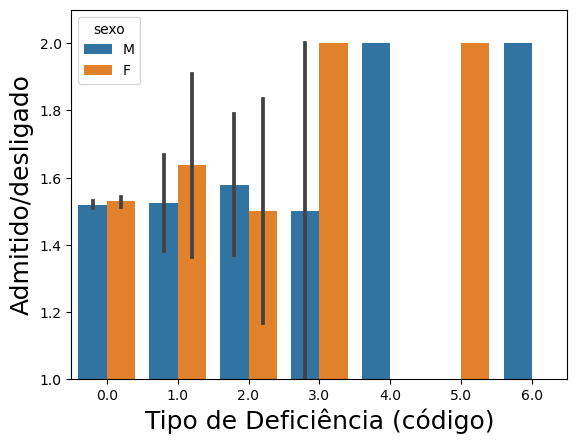

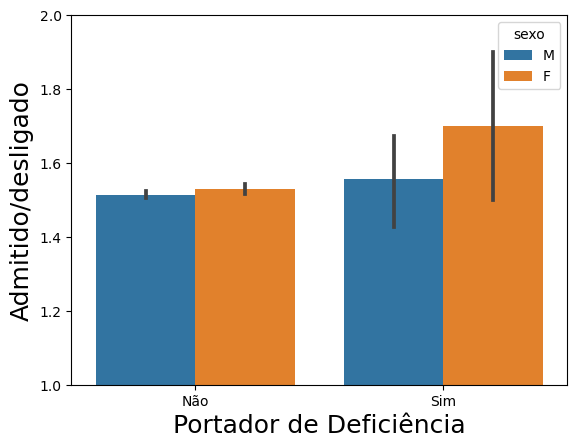

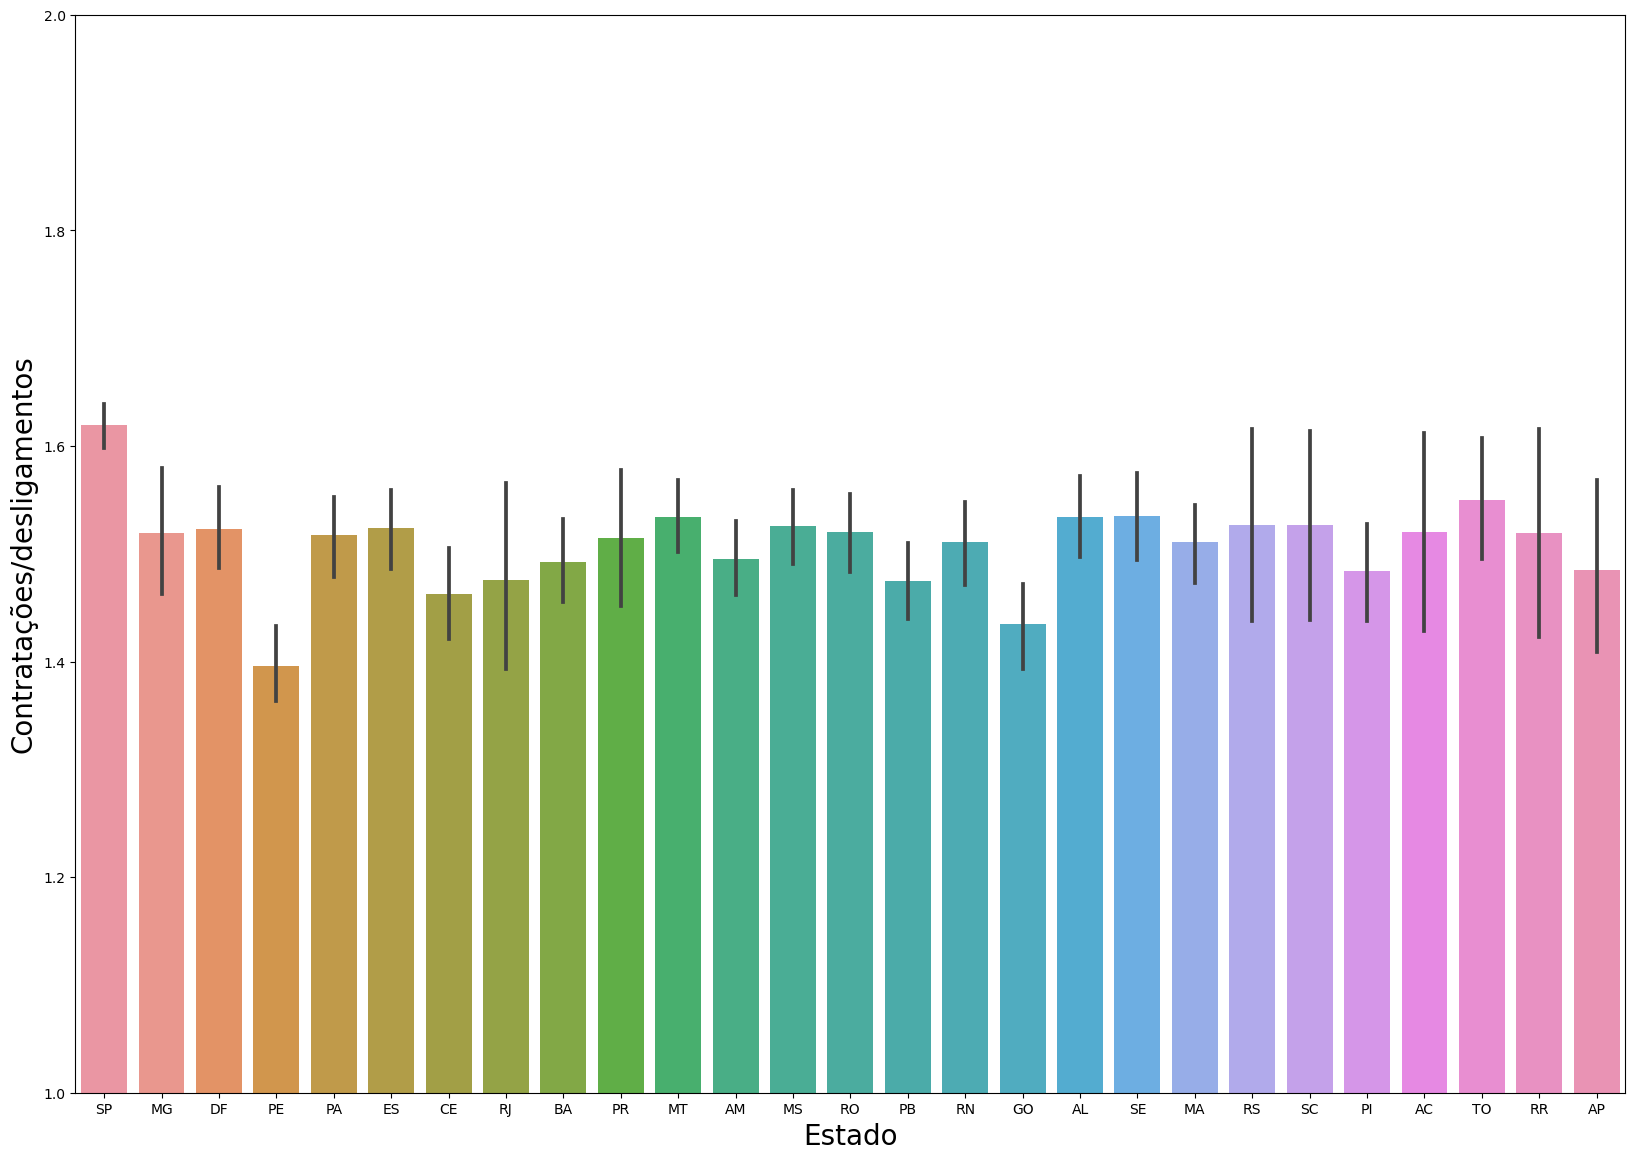

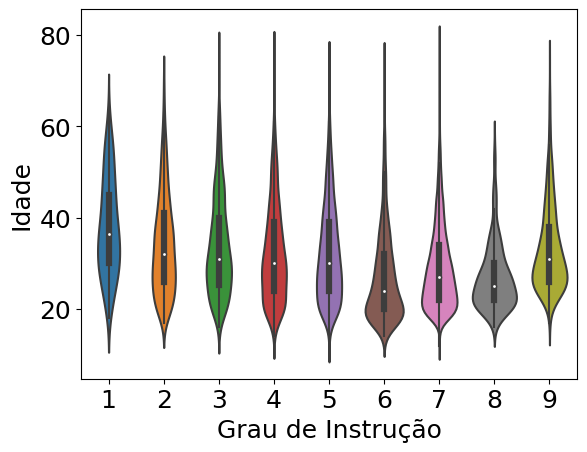

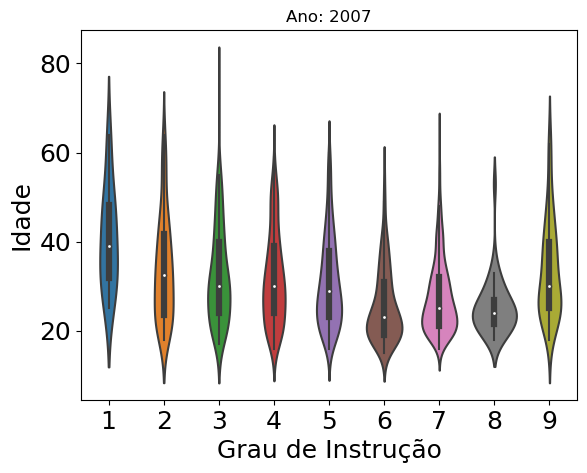

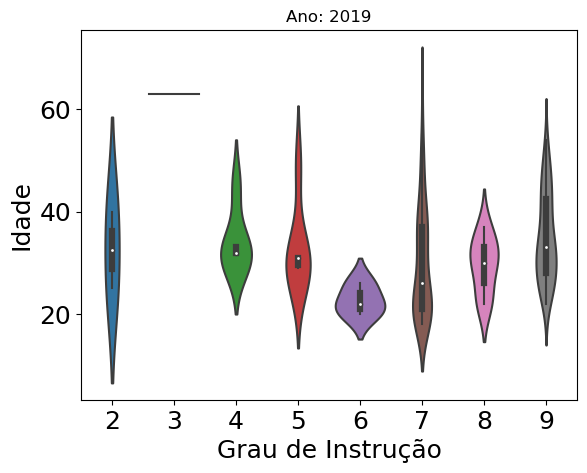

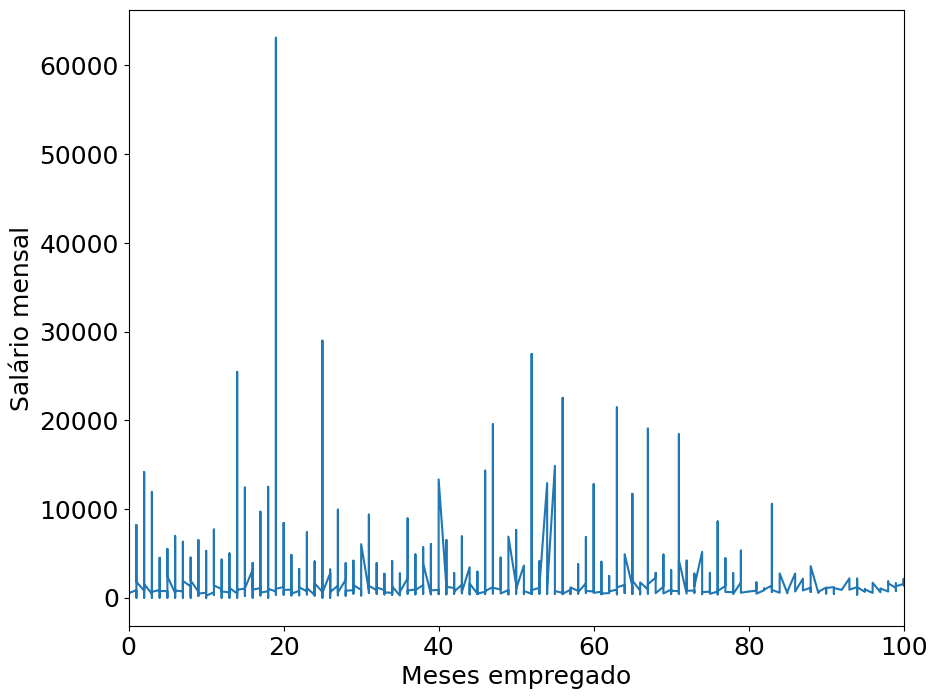

In [33]:
df_sorted = df.sort_values('tempo_emprego')
plt.figure(figsize=(10,8))
plt.xlim(0,100)
plt.xlabel('Meses empregado',fontsize = 18)
plt.ylabel('Salário mensal',fontsize = 18)
plt.plot(df_sorted['tempo_emprego'], df_sorted['salario_mensal'])
plt.show()

## Encoding


In [34]:
df = pd.get_dummies(data=df, columns=['sigla_uf'])
df_ajustes = pd.get_dummies(data=df_ajustes, columns=['sigla_uf'])
df_mov = pd.get_dummies(data=df_mov, columns=['sigla_uf'])
df_mov_prazo = pd.get_dummies(data=df_mov_prazo, columns=['sigla_uf'])


## df_mov_prazos

In [35]:
df_mov_prazo.dtypes
#  cnae_2_secao                       object
df_mov_prazo.cnae_2_secao.value_counts()

G    5865
N    3535
C    3093
F    2985
Q    2151
I    1750
H    1220
M    1100
P     753
S     732
A     602
J     329
R     179
L     117
K     111
E     106
B      82
O      43
D       9
U       1
T       1
Name: cnae_2_secao, dtype: int64

In [36]:
le.fit(df_mov_prazo['cnae_2_secao'])
df_mov_prazo['cnae_2_secao'] = le.transform(df_mov_prazo['cnae_2_secao'])

## df_mov

In [37]:
df_mov.dtypes
# cnae_2_secao                       object
df_mov.cnae_2_secao.value_counts()

G    6526
C    3462
N    3409
F    3070
I    1388
Q    1361
H    1291
A    1102
M     758
P     731
J     490
S     486
E     188
K     174
B     123
R     108
L      92
O      37
D      28
T       4
U       2
Name: cnae_2_secao, dtype: int64

In [38]:
le.fit(df_mov['cnae_2_secao'])
df_mov['cnae_2_secao'] = le.transform(df_mov['cnae_2_secao'])

## df_ajustes

In [39]:
df_ajustes.dtypes
# não tem object

ano                                 int64
mes                                 int64
id_municipio                        int64
admitidos_desligados                int64
tipo_estabelecimento                int64
tipo_movimentacao_desagregado       int64
tempo_emprego                     float64
quantidade_horas_contratadas        int64
salario_mensal                    float64
saldo_movimentacao                  int64
indicador_aprendiz                  int64
indicador_portador_deficiencia      int64
tipo_deficiencia                    int64
cbo_2002                            int64
cnae_1                              int64
cnae_2_subclasse                    int64
grau_instrucao                      int64
idade                               int64
sexo                                int64
raca_cor                            int64
subsetor_ibge                       int64
regiao_corede_04                    int64
sigla_uf_AC                         uint8
sigla_uf_AL                       

## df

In [40]:
cnae_1_values = ["000-1", "45217", "74993", "52124", "55212", "52329", "74500", "15610", "74705", "01414", "52442", "60267", "01139", "52493", "52418",
"45292",'45225']
df['cnae_1'] = df.cnae_1.apply(lambda k: k if k in cnae_1_values else 'other')
le.fit(df['cnae_1'])
df['cnae_1'] = le.transform(df['cnae_1'])


In [41]:
cnae_2_s_values = ['4120400', '00000-1', '4711302', '4781400', 
    '5611201', '1071600', '8121400', '0151201', 
    '0113000', '4930202', '7820500', '8220200', 
    '4211101', '5611203', '4712100', '4731800', '0115600']

df['cnae_2_subclasse'] = df.cnae_2_subclasse.apply(lambda x: x if x in cnae_2_s_values else 'other')
le.fit(df['cnae_2_subclasse'])
df['cnae_2_subclasse'] = le.transform(df['cnae_2_subclasse'])

In [42]:
df.dtypes

ano                                 int64
mes                                 int64
id_municipio                        int64
admitidos_desligados                int64
tipo_estabelecimento                int64
tipo_movimentacao_desagregado       int64
tempo_emprego                     float64
quantidade_horas_contratadas        int64
salario_mensal                    float64
saldo_movimentacao                  int64
indicador_aprendiz                  int64
indicador_portador_deficiencia      int64
tipo_deficiencia                  float64
cbo_2002                            int64
cnae_1                              int64
cnae_2                              int64
cnae_2_subclasse                    int64
grau_instrucao                      int64
idade                               int64
sexo                                int64
raca_cor                          float64
subsetor_ibge                       int64
regiao_corede_04                    int64
sigla_uf_AC                       

# Splitting


In [43]:
# não será definido o alvo por enquanto, já que será necessário alterar valores NaN 
# e assim evita-se contaminação
x_train, x_test, y_train, y_test = train_test_split(df,df, train_size=0.8, random_state=0)

# Correlations


In [44]:
df_corr = df.drop(["tipo_movimentacao_desagregado", 'sigla_uf_AC', 'sigla_uf_AL',
       'sigla_uf_AM', 'sigla_uf_AP', 'sigla_uf_BA', 'sigla_uf_CE',
       'sigla_uf_DF', 'sigla_uf_ES', 'sigla_uf_GO', 'sigla_uf_MA',
       'sigla_uf_MG', 'sigla_uf_MS', 'sigla_uf_MT', 'sigla_uf_PA',
       'sigla_uf_PB', 'sigla_uf_PE', 'sigla_uf_PI', 'sigla_uf_PR',
       'sigla_uf_RJ', 'sigla_uf_RN', 'sigla_uf_RO', 'sigla_uf_RR',
       'sigla_uf_RS', 'sigla_uf_SC', 'sigla_uf_SE', 'sigla_uf_TO',
       "cnae_2_subclasse"], axis='columns')
df_corr.corr(method='pearson', numeric_only=True)

,ano,mes,id_municipio,admitidos_desligados,tipo_estabelecimento,tempo_emprego,quantidade_horas_contratadas,salario_mensal,saldo_movimentacao,indicador_aprendiz,...,cbo_2002,cnae_1,cnae_2,grau_instrucao,idade,sexo,raca_cor,subsetor_ibge,regiao_corede_04,sigla_uf_SP
ano,1.000000,0.001949,-0.307938,0.080720,-0.127193,0.043270,-0.038647,0.235561,-0.080720,0.049272,...,-0.083755,0.292610,0.121260,0.160199,0.030507,0.025724,0.125592,-0.032045,0.018256,0.191498
mes,0.001949,1.000000,-0.006985,0.020554,-0.002642,0.003394,-0.008645,0.015659,-0.020554,0.017340,...,-0.002717,-0.021414,0.009726,0.002198,0.003142,0.014303,0.004121,0.018014,-0.013724,-0.001379
id_municipio,-0.307938,-0.006985,1.000000,0.017315,0.065981,-0.009888,-0.004146,-0.012965,-0.017315,-0.019124,...,-0.003841,-0.069265,-0.046435,-0.054923,0.009337,0.020378,-0.252158,0.094706,-0.057818,0.154687
admitidos_desligados,0.080720,0.020554,0.017315,1.000000,-0.007877,0.357979,0.006271,0.075323,-1.000000,0.009673,...,-0.030969,0.006032,0.006333,-0.014131,0.056046,0.013731,-0.040418,0.013046,-0.020448,0.082785
tipo_estabelecimento,-0.127193,-0.002642,0.065981,-0.007877,1.000000,-0.036276,0.077764,-0.053838,0.007877,-0.042269,...,0.129241,-0.243373,-0.355772,-0.300184,0.099484,-0.129511,0.010244,0.303186,0.001804,-0.001855
tempo_emprego,0.043270,0.003394,-0.009888,0.357979,-0.036276,1.000000,-0.019180,0.153840,-0.357979,-0.009293,...,-0.087239,0.046139,0.033908,0.035723,0.200028,0.039110,-0.064405,-0.007195,0.001985,0.054384
quantidade_horas_contratadas,-0.038647,-0.008645,-0.004146,0.006271,0.077764,-0.019180,1.000000,0.011944,-0.006271,-0.507648,...,0.224130,-0.095185,-0.213281,-0.160551,0.101612,-0.128042,0.022581,-0.103385,-0.001057,-0.033428
salario_mensal,0.235561,0.015659,-0.012965,0.075323,-0.053838,0.153840,0.011944,1.000000,-0.075323,-0.057175,...,-0.174429,0.087956,0.064121,0.198364,0.147533,-0.034598,-0.056228,-0.030267,-0.005505,0.169328
saldo_movimentacao,-0.080720,-0.020554,-0.017315,-1.000000,0.007877,-0.357979,-0.006271,-0.075323,1.000000,-0.009673,...,0.030969,-0.006032,-0.006333,0.014131,-0.056046,-0.013731,0.040418,-0.013046,0.020448,-0.082785
indicador_aprendiz,0.049272,0.017340,-0.019124,0.009673,-0.042269,-0.009293,-0.507648,-0.057175,-0.009673,1.000000,...,-0.076019,0.048822,0.041978,0.023852,-0.157529,0.046534,0.015591,-0.005429,-0.000457,-0.006706


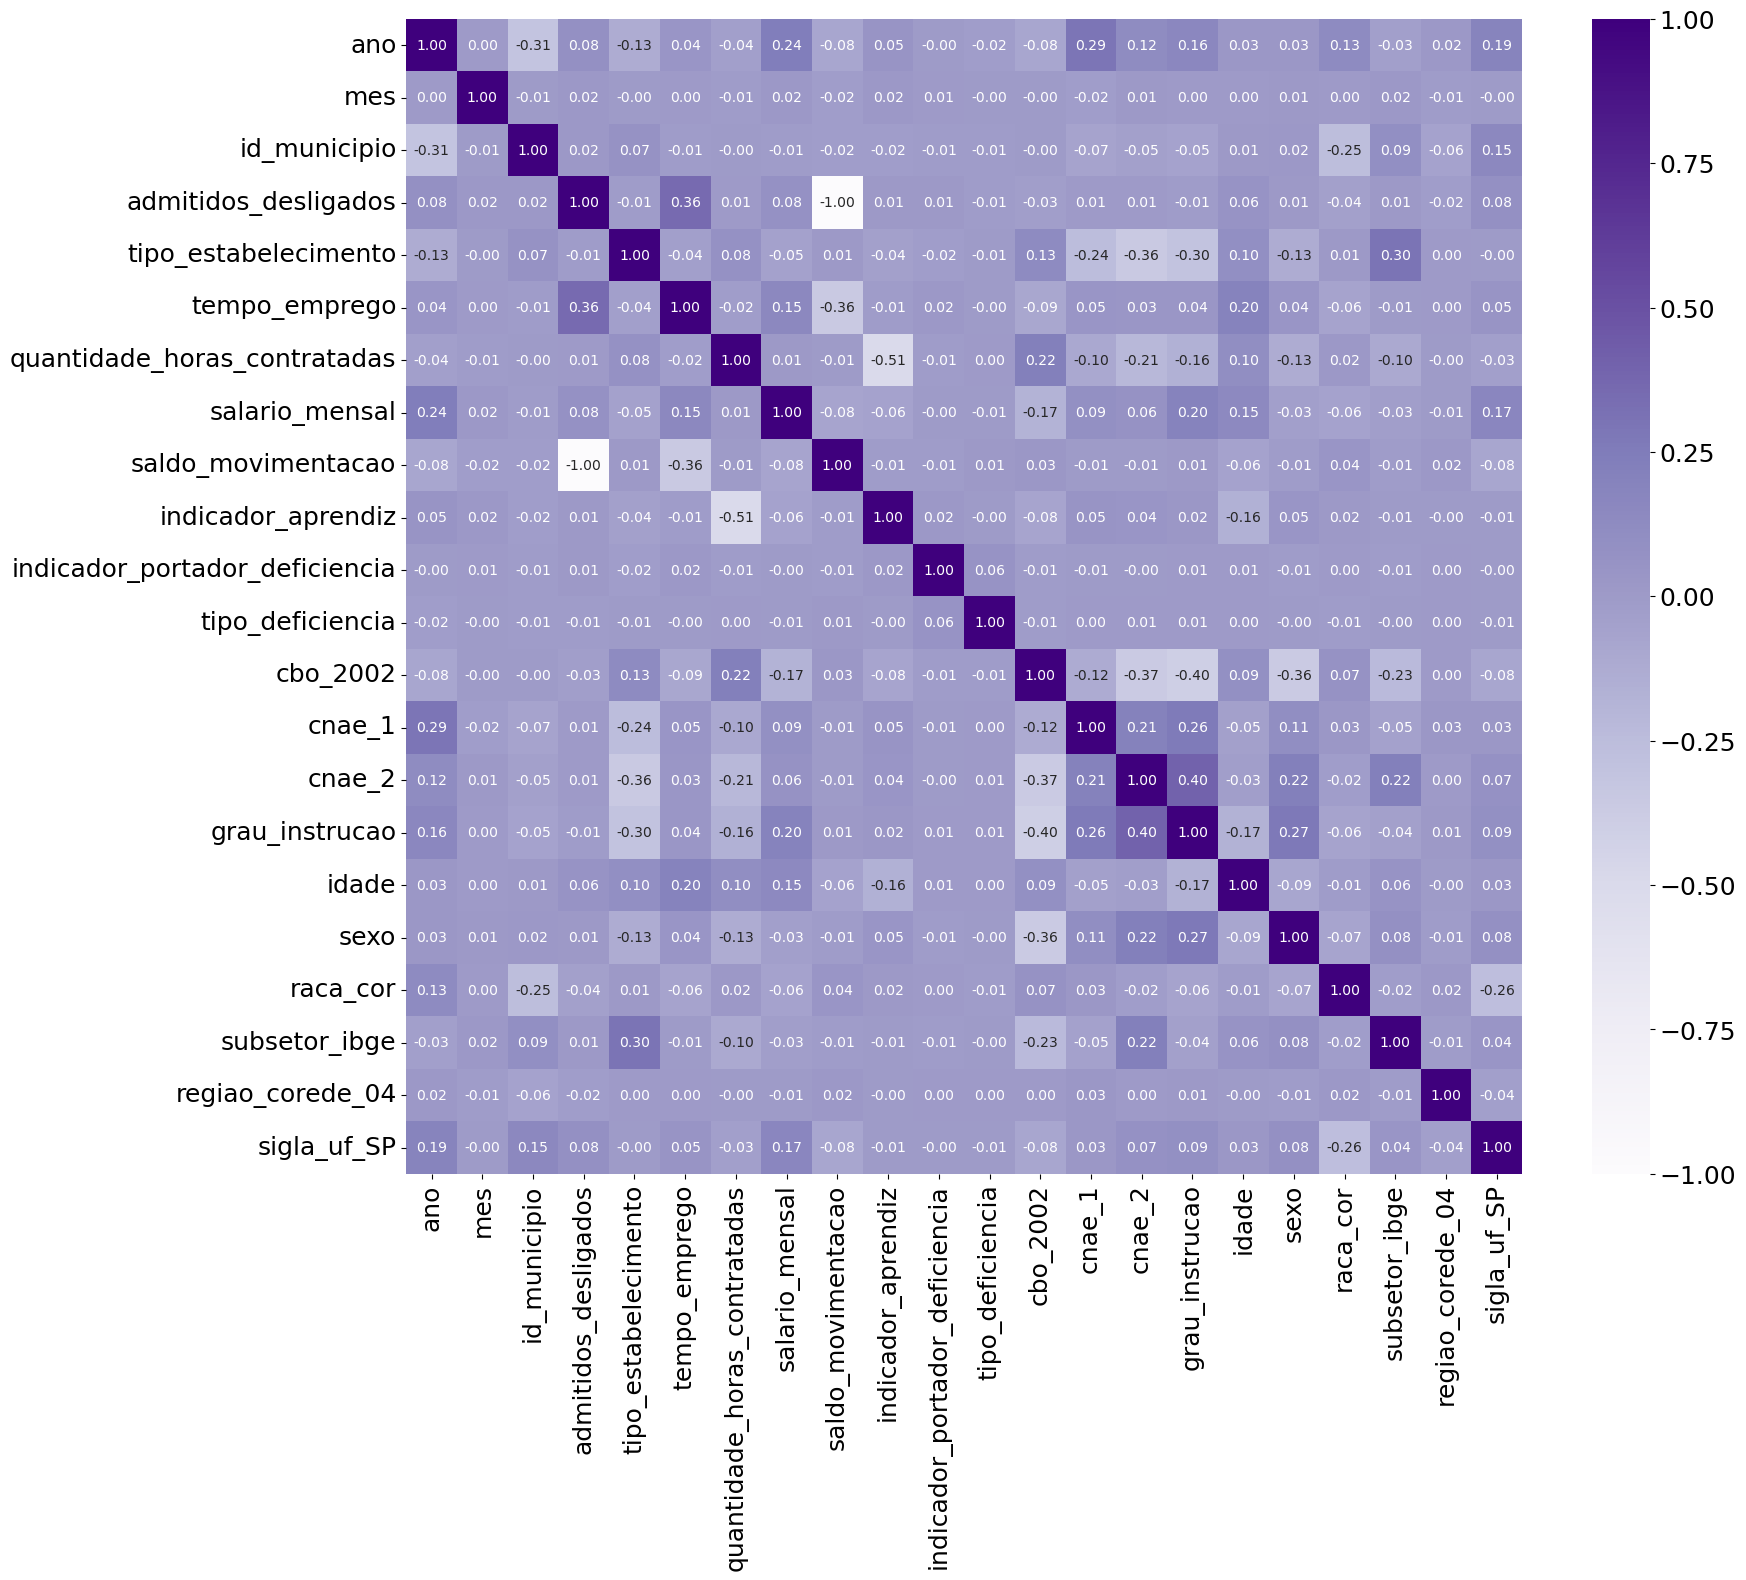

In [45]:
plt.figure(figsize=(18,15))
sns.heatmap(df_corr.corr('pearson'),annot= True, fmt= '.2f', cmap='Purples')
plt.show()

In [46]:
df_mov.columns

Index(['ano', 'mes', 'id_municipio', 'cnae_2_secao', 'cnae_2_subclasse',
       'cbo_2002', 'saldo_movimentacao', 'categoria', 'grau_instrucao',
       'raca_cor', 'sexo', 'tipo_empregador', 'tipo_estabelecimento',
       'tipo_movimentacao', 'tipo_deficiencia',
       'indicador_trabalho_intermitente', 'indicador_trabalho_parcial',
       'indicador_aprendiz', 'indicador_fora_prazo', 'sigla_uf_AC',
       'sigla_uf_AL', 'sigla_uf_AM', 'sigla_uf_AP', 'sigla_uf_BA',
       'sigla_uf_CE', 'sigla_uf_DF', 'sigla_uf_ES', 'sigla_uf_GO',
       'sigla_uf_MA', 'sigla_uf_MS', 'sigla_uf_MT', 'sigla_uf_PA',
       'sigla_uf_PB', 'sigla_uf_PE', 'sigla_uf_PI', 'sigla_uf_RN',
       'sigla_uf_RO', 'sigla_uf_RR', 'sigla_uf_SE', 'sigla_uf_SP'],
      dtype='object')

In [47]:
df_mov_corr = df_mov.drop(['cnae_2_subclasse', 'sigla_uf_AC', 'sigla_uf_AL',
       'sigla_uf_AM', 'sigla_uf_AP', 'sigla_uf_BA', 'sigla_uf_CE',
       'sigla_uf_DF', 'sigla_uf_ES', 'sigla_uf_GO', 'sigla_uf_MA',
       'sigla_uf_MS', 'sigla_uf_MT', 'sigla_uf_PA',
       'sigla_uf_PB', 'sigla_uf_PE', 'sigla_uf_PI', 
       'sigla_uf_RN', 'sigla_uf_RO', 'sigla_uf_RR',
       'sigla_uf_SE', 'indicador_fora_prazo'], axis='columns')
df_mov_corr.corr(method='pearson', numeric_only=True)

,ano,mes,id_municipio,cnae_2_secao,cbo_2002,saldo_movimentacao,categoria,grau_instrucao,raca_cor,sexo,tipo_empregador,tipo_estabelecimento,tipo_movimentacao,tipo_deficiencia,indicador_trabalho_intermitente,indicador_trabalho_parcial,indicador_aprendiz,sigla_uf_SP
ano,1.000000,-0.252992,-0.127689,0.010286,-0.020607,0.027826,-0.159673,0.003202,0.081487,0.003634,-0.017404,0.016782,0.493523,-0.015541,-0.015218,-0.018842,0.015853,-0.040884
mes,-0.252992,1.000000,0.126962,-0.002124,0.010947,0.029165,-0.062892,0.009486,-0.013923,0.010999,0.000727,0.002114,0.170921,0.000049,-0.004303,0.007153,-0.012688,0.120771
id_municipio,-0.127689,0.126962,1.000000,0.028794,-0.039388,-0.023468,0.018311,0.014327,-0.002764,0.057653,0.018149,-0.030982,-0.075255,-0.017130,0.008594,0.022532,-0.017832,0.071968
cnae_2_secao,0.010286,-0.002124,0.028794,1.000000,-0.418781,0.002434,0.038658,0.144442,-0.003229,0.261063,-0.099531,-0.139275,0.015198,-0.003155,-0.000941,0.013323,0.010763,0.020822
cbo_2002,-0.020607,0.010947,-0.039388,-0.418781,1.000000,0.009195,-0.022158,-0.211801,0.035964,-0.362574,0.036418,0.151737,-0.017313,0.009440,0.014085,-0.005308,-0.063339,-0.011364
saldo_movimentacao,0.027826,0.029165,-0.023468,0.002434,0.009195,1.000000,-0.073313,-0.001790,0.039107,-0.003429,-0.007570,0.007542,0.231680,0.002942,-0.048117,-0.027553,-0.024165,-0.013504
categoria,-0.159673,-0.062892,0.018311,0.038658,-0.022158,-0.073313,1.000000,-0.021907,0.023633,0.013448,0.132199,-0.023333,-0.117489,-0.016803,0.181021,0.054402,-0.038807,-0.003891
grau_instrucao,0.003202,0.009486,0.014327,0.144442,-0.211801,-0.001790,-0.021907,1.000000,-0.030543,0.093856,-0.022513,-0.053266,0.004653,-0.010848,-0.005794,0.022778,-0.017753,0.008270
raca_cor,0.081487,-0.013923,-0.002764,-0.003229,0.035964,0.039107,0.023633,-0.030543,1.000000,-0.032385,-0.011155,0.014100,0.059607,-0.014219,0.170883,0.066279,-0.011885,-0.089203
sexo,0.003634,0.010999,0.057653,0.261063,-0.362574,-0.003429,0.013448,0.093856,-0.032385,1.000000,-0.032397,-0.131917,0.015334,-0.017471,-0.001904,-0.018536,0.042439,0.029900


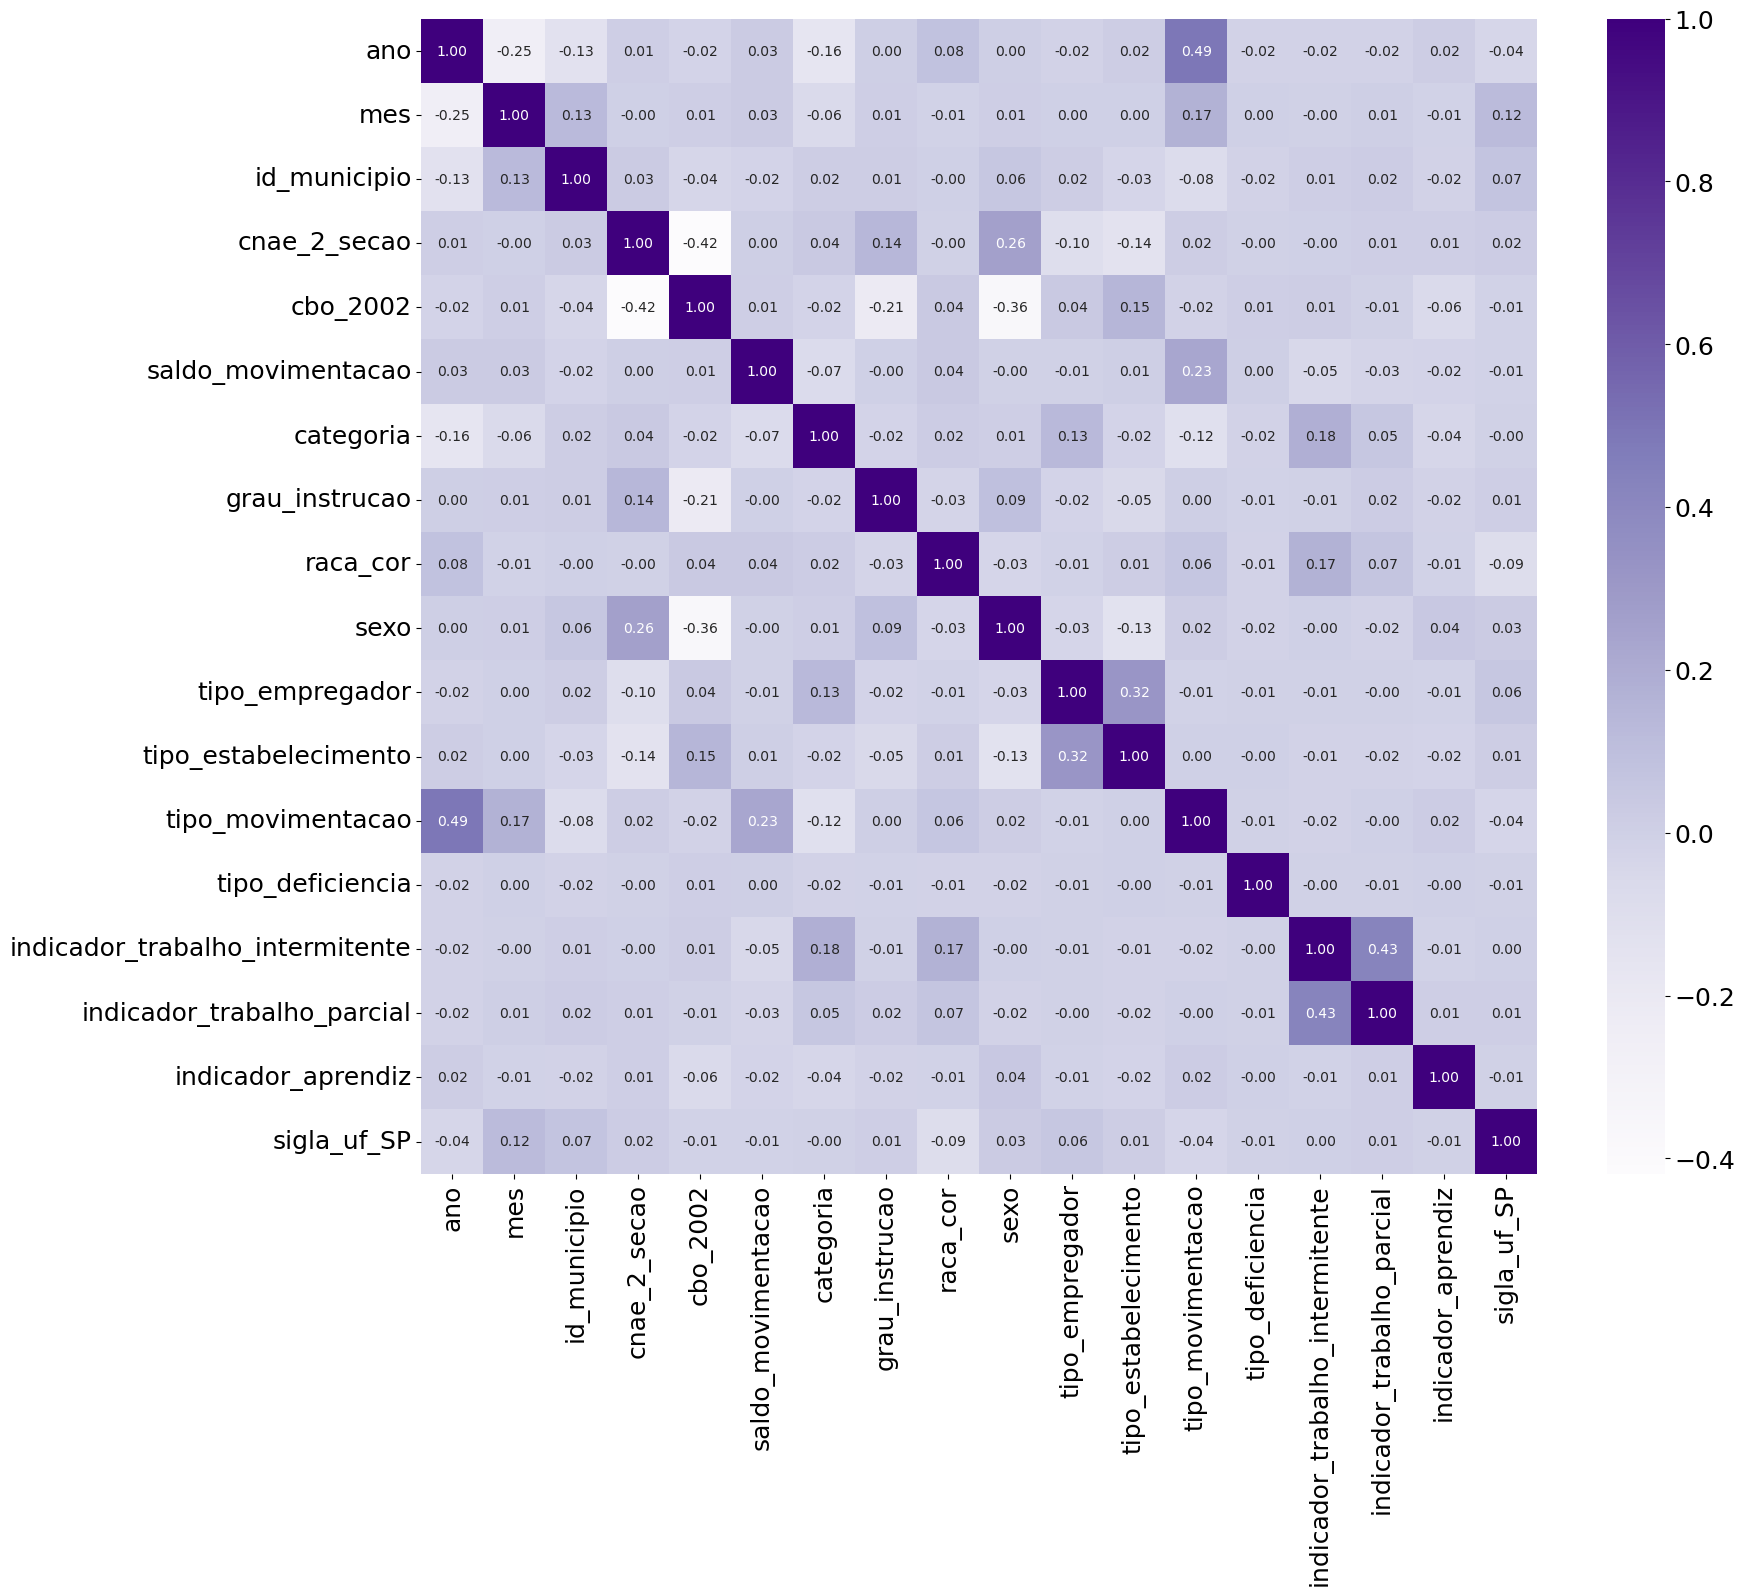

In [48]:
plt.figure(figsize=(18,15))
sns.heatmap(df_mov_corr.corr('pearson'),annot= True, fmt= '.2f', cmap='Purples')
plt.show()

In [49]:
df_mov_prazo.columns

Index(['ano', 'mes', 'id_municipio', 'cnae_2_secao', 'cnae_2_subclasse',
       'cbo_2002', 'saldo_movimentacao', 'categoria', 'grau_instrucao',
       'raca_cor', 'sexo', 'tipo_empregador', 'tipo_estabelecimento',
       'tipo_movimentacao', 'tipo_deficiencia',
       'indicador_trabalho_intermitente', 'indicador_trabalho_parcial',
       'indicador_aprendiz', 'indicador_fora_prazo', 'sigla_uf_AC',
       'sigla_uf_AL', 'sigla_uf_AM', 'sigla_uf_AP', 'sigla_uf_BA',
       'sigla_uf_CE', 'sigla_uf_DF', 'sigla_uf_ES', 'sigla_uf_GO',
       'sigla_uf_MA', 'sigla_uf_MG', 'sigla_uf_MS', 'sigla_uf_MT',
       'sigla_uf_PA', 'sigla_uf_PB', 'sigla_uf_PE', 'sigla_uf_PI',
       'sigla_uf_PR', 'sigla_uf_RJ', 'sigla_uf_RN', 'sigla_uf_RO',
       'sigla_uf_RR', 'sigla_uf_RS', 'sigla_uf_SC', 'sigla_uf_SE',
       'sigla_uf_TO'],
      dtype='object')

In [50]:
df_mov_prazo_corr = df_mov_prazo.drop(['ano', 'cnae_2_subclasse', 'indicador_fora_prazo', 'sigla_uf_AC',
       'sigla_uf_AL', 'sigla_uf_AM', 'sigla_uf_AP', 'sigla_uf_BA',
       'sigla_uf_CE', 'sigla_uf_DF', 'sigla_uf_ES', 'sigla_uf_GO',
       'sigla_uf_MA', 'sigla_uf_MG', 'sigla_uf_MS', 'sigla_uf_MT',
       'sigla_uf_PA', 'sigla_uf_PB', 'sigla_uf_PE', 'sigla_uf_PI',
       'sigla_uf_PR', 'sigla_uf_RJ', 'sigla_uf_RN', 'sigla_uf_RO',
       'sigla_uf_RR', 'sigla_uf_RS', 'sigla_uf_SC', 'sigla_uf_SE',
       'sigla_uf_TO'], axis='columns')
df_mov_prazo_corr.corr(method='pearson', numeric_only=True)

,mes,id_municipio,cnae_2_secao,cbo_2002,saldo_movimentacao,categoria,grau_instrucao,raca_cor,sexo,tipo_empregador,tipo_estabelecimento,tipo_movimentacao,tipo_deficiencia,indicador_trabalho_intermitente,indicador_trabalho_parcial,indicador_aprendiz
mes,1.000000,-0.402315,0.066289,-0.052812,0.003703,0.010041,0.021971,0.032552,0.014496,-0.013171,-0.011794,-0.008598,-0.003951,0.004319,-0.018246,-0.002089
id_municipio,-0.402315,1.000000,-0.003063,0.014038,-0.016702,-0.071501,-0.005207,-0.017373,0.052134,0.013664,-0.004564,0.036607,0.018639,-0.001980,0.024061,0.008876
cnae_2_secao,0.066289,-0.003063,1.000000,-0.467224,-0.053030,-0.049876,0.138665,-0.037263,0.284533,-0.088177,-0.132898,0.054109,-0.016588,-0.011041,-0.016160,0.056823
cbo_2002,-0.052812,0.014038,-0.467224,1.000000,0.017806,0.017287,-0.187508,0.058000,-0.405731,0.043041,0.131700,-0.004458,-0.013261,0.012091,0.025717,-0.038719
saldo_movimentacao,0.003703,-0.016702,-0.053030,0.017806,1.000000,0.026188,-0.021348,-0.000334,-0.041733,-0.012910,-0.009529,-0.799782,0.009960,-0.087818,-0.063553,-0.044459
categoria,0.010041,-0.071501,-0.049876,0.017287,0.026188,1.000000,-0.065179,0.062110,-0.035317,0.069790,-0.054082,-0.029533,-0.006488,0.184372,0.092503,-0.045184
grau_instrucao,0.021971,-0.005207,0.138665,-0.187508,-0.021348,-0.065179,1.000000,-0.022889,0.097208,-0.017734,-0.036863,0.029852,-0.003980,-0.004738,0.004221,-0.010966
raca_cor,0.032552,-0.017373,-0.037263,0.058000,-0.000334,0.062110,-0.022889,1.000000,-0.057682,-0.025904,-0.008957,-0.009159,-0.005380,0.273128,0.187788,-0.006507
sexo,0.014496,0.052134,0.284533,-0.405731,-0.041733,-0.035317,0.097208,-0.057682,1.000000,-0.037581,-0.113532,0.018804,-0.009228,-0.005936,-0.020229,0.013920
tipo_empregador,-0.013171,0.013664,-0.088177,0.043041,-0.012910,0.069790,-0.017734,-0.025904,-0.037581,1.000000,0.365217,0.011826,-0.003229,-0.008041,-0.010765,-0.007183


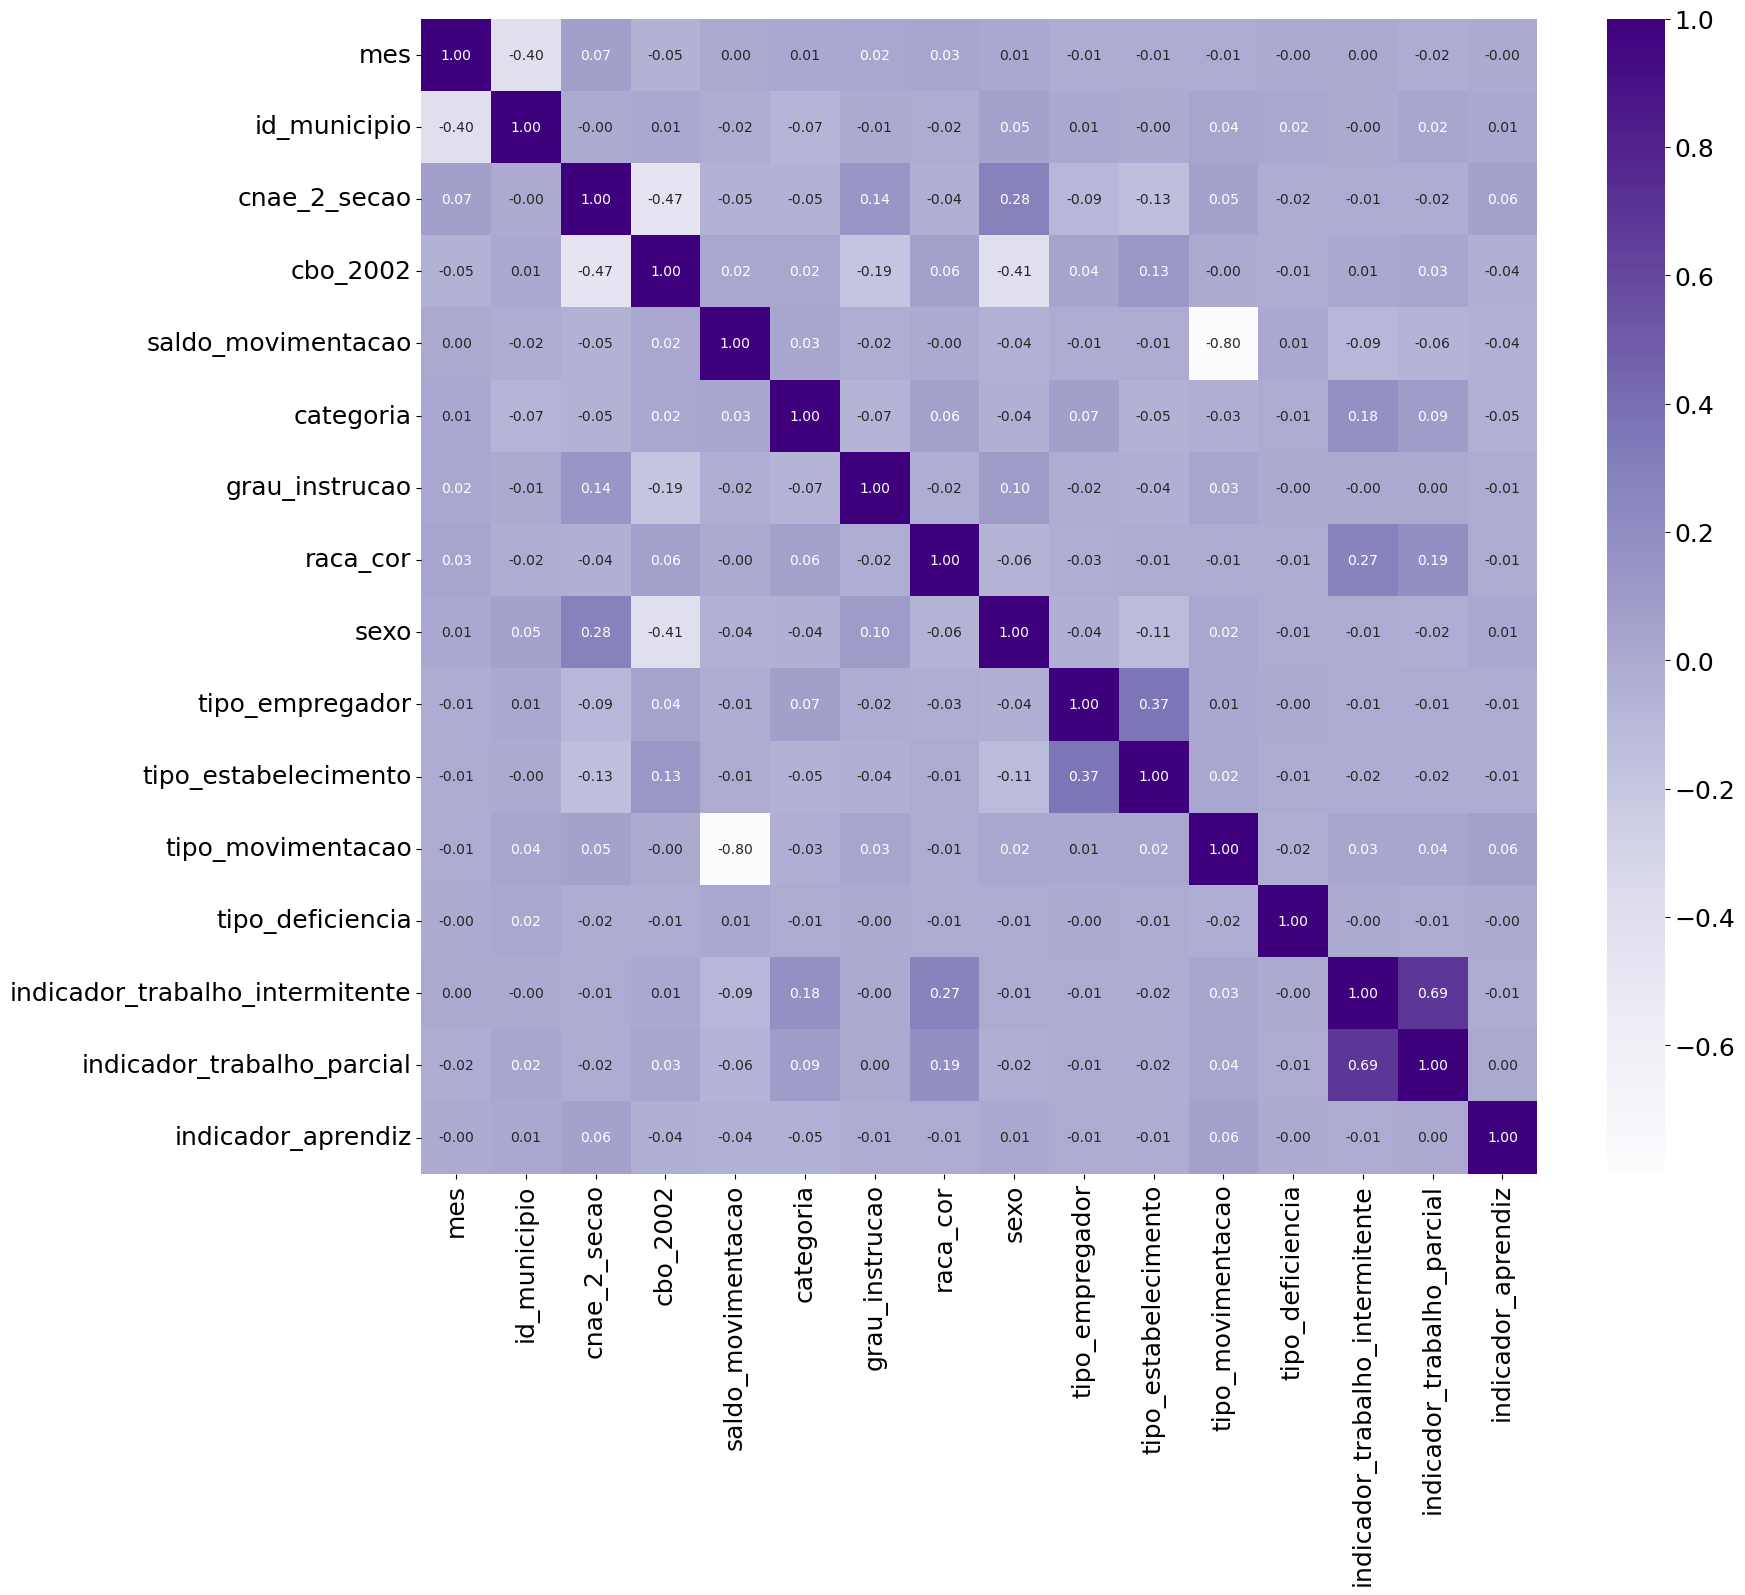

In [51]:
plt.figure(figsize=(18,15))
sns.heatmap(df_mov_prazo_corr.corr('pearson'),annot= True, fmt= '.2f', cmap='Purples')
plt.show()

In [52]:
df_ajustes.columns

Index(['ano', 'mes', 'id_municipio', 'admitidos_desligados',
       'tipo_estabelecimento', 'tipo_movimentacao_desagregado',
       'tempo_emprego', 'quantidade_horas_contratadas', 'salario_mensal',
       'saldo_movimentacao', 'indicador_aprendiz',
       'indicador_portador_deficiencia', 'tipo_deficiencia', 'cbo_2002',
       'cnae_1', 'cnae_2_subclasse', 'grau_instrucao', 'idade', 'sexo',
       'raca_cor', 'subsetor_ibge', 'regiao_corede_04', 'sigla_uf_AC',
       'sigla_uf_AL', 'sigla_uf_AM', 'sigla_uf_AP', 'sigla_uf_BA',
       'sigla_uf_CE', 'sigla_uf_DF', 'sigla_uf_ES', 'sigla_uf_GO',
       'sigla_uf_MA', 'sigla_uf_MG', 'sigla_uf_MS', 'sigla_uf_MT',
       'sigla_uf_PA', 'sigla_uf_PB', 'sigla_uf_PE', 'sigla_uf_PI',
       'sigla_uf_PR', 'sigla_uf_RJ', 'sigla_uf_RN', 'sigla_uf_RO',
       'sigla_uf_RR', 'sigla_uf_RS', 'sigla_uf_SC', 'sigla_uf_SE',
       'sigla_uf_TO'],
      dtype='object')

In [53]:
df_ajustes_corr = df_ajustes.drop(['cnae_2_subclasse',
        'sigla_uf_AL', 'sigla_uf_AM', 'sigla_uf_AP', 'sigla_uf_BA',
       'sigla_uf_CE', 'sigla_uf_DF', 'sigla_uf_ES', 'sigla_uf_GO',
       'sigla_uf_MA', 'sigla_uf_MG', 'sigla_uf_MS', 'sigla_uf_MT',
       'sigla_uf_PA', 'sigla_uf_PB', 'sigla_uf_PE', 'sigla_uf_PI',
       'sigla_uf_PR', 'sigla_uf_RJ', 'sigla_uf_RN', 'sigla_uf_RO',
       'sigla_uf_RR', 'sigla_uf_RS', 'sigla_uf_SC', 'sigla_uf_SE',
       'sigla_uf_TO','sigla_uf_AC'], axis='columns')
df_ajustes_corr.corr(method='pearson', numeric_only=True)

,ano,mes,id_municipio,admitidos_desligados,tipo_estabelecimento,tipo_movimentacao_desagregado,tempo_emprego,quantidade_horas_contratadas,salario_mensal,saldo_movimentacao,...,indicador_portador_deficiencia,tipo_deficiencia,cbo_2002,cnae_1,grau_instrucao,idade,sexo,raca_cor,subsetor_ibge,regiao_corede_04
ano,1.000000,0.018787,-0.129528,-0.014304,-0.016190,-0.032192,-0.014819,0.024690,0.046233,0.014304,...,0.006484,-0.269376,0.024874,-0.018982,0.043569,-0.020156,-0.003371,0.151402,-0.038381,0.054742
mes,0.018787,1.000000,-0.034257,-0.028529,-0.005690,-0.029011,-0.000106,0.012969,0.017036,0.028529,...,0.012510,-0.046436,0.010315,0.018652,0.009060,0.006717,-0.017180,0.011069,-0.005753,-0.017165
id_municipio,-0.129528,-0.034257,1.000000,0.054496,-0.004556,-0.019817,0.009814,0.000119,0.034145,-0.054496,...,-0.009382,0.024794,-0.024141,-0.006763,0.022743,-0.002934,0.049227,-0.315058,0.025920,-0.220327
admitidos_desligados,-0.014304,-0.028529,0.054496,1.000000,-0.014302,0.391699,0.447779,0.023337,0.028819,-1.000000,...,0.010474,0.020697,0.013497,-0.002315,0.000280,0.034438,-0.009788,-0.052926,0.001186,-0.011891
tipo_estabelecimento,-0.016190,-0.005690,-0.004556,-0.014302,1.000000,0.037579,-0.029919,0.057125,-0.022657,0.014302,...,-0.002871,0.029431,0.104419,-0.352425,-0.238592,0.065799,-0.138229,0.039618,0.237801,0.039715
tipo_movimentacao_desagregado,-0.032192,-0.029011,-0.019817,0.391699,0.037579,1.000000,0.066898,-0.002205,-0.010565,-0.391699,...,-0.002873,0.004063,0.014817,-0.027148,-0.032012,-0.008735,-0.001942,0.020139,0.047909,0.006198
tempo_emprego,-0.014819,-0.000106,0.009814,0.447779,-0.029919,0.066898,1.000000,-0.015848,0.069380,-0.447779,...,0.017209,0.016681,-0.057100,0.037003,0.011896,0.149387,0.052050,-0.038592,0.020912,-0.006143
quantidade_horas_contratadas,0.024690,0.012969,0.000119,0.023337,0.057125,-0.002205,-0.015848,1.000000,0.033840,-0.023337,...,-0.008143,0.002873,0.201642,-0.164453,-0.145137,0.023101,-0.116873,0.043218,-0.125395,0.031859
salario_mensal,0.046233,0.017036,0.034145,0.028819,-0.022657,-0.010565,0.069380,0.033840,1.000000,-0.028819,...,-0.002915,-0.022224,-0.084100,0.019209,0.110227,0.112477,-0.040864,-0.027533,-0.035807,-0.017185
saldo_movimentacao,0.014304,0.028529,-0.054496,-1.000000,0.014302,-0.391699,-0.447779,-0.023337,-0.028819,1.000000,...,-0.010474,-0.020697,-0.013497,0.002315,-0.000280,-0.034438,0.009788,0.052926,-0.001186,0.011891


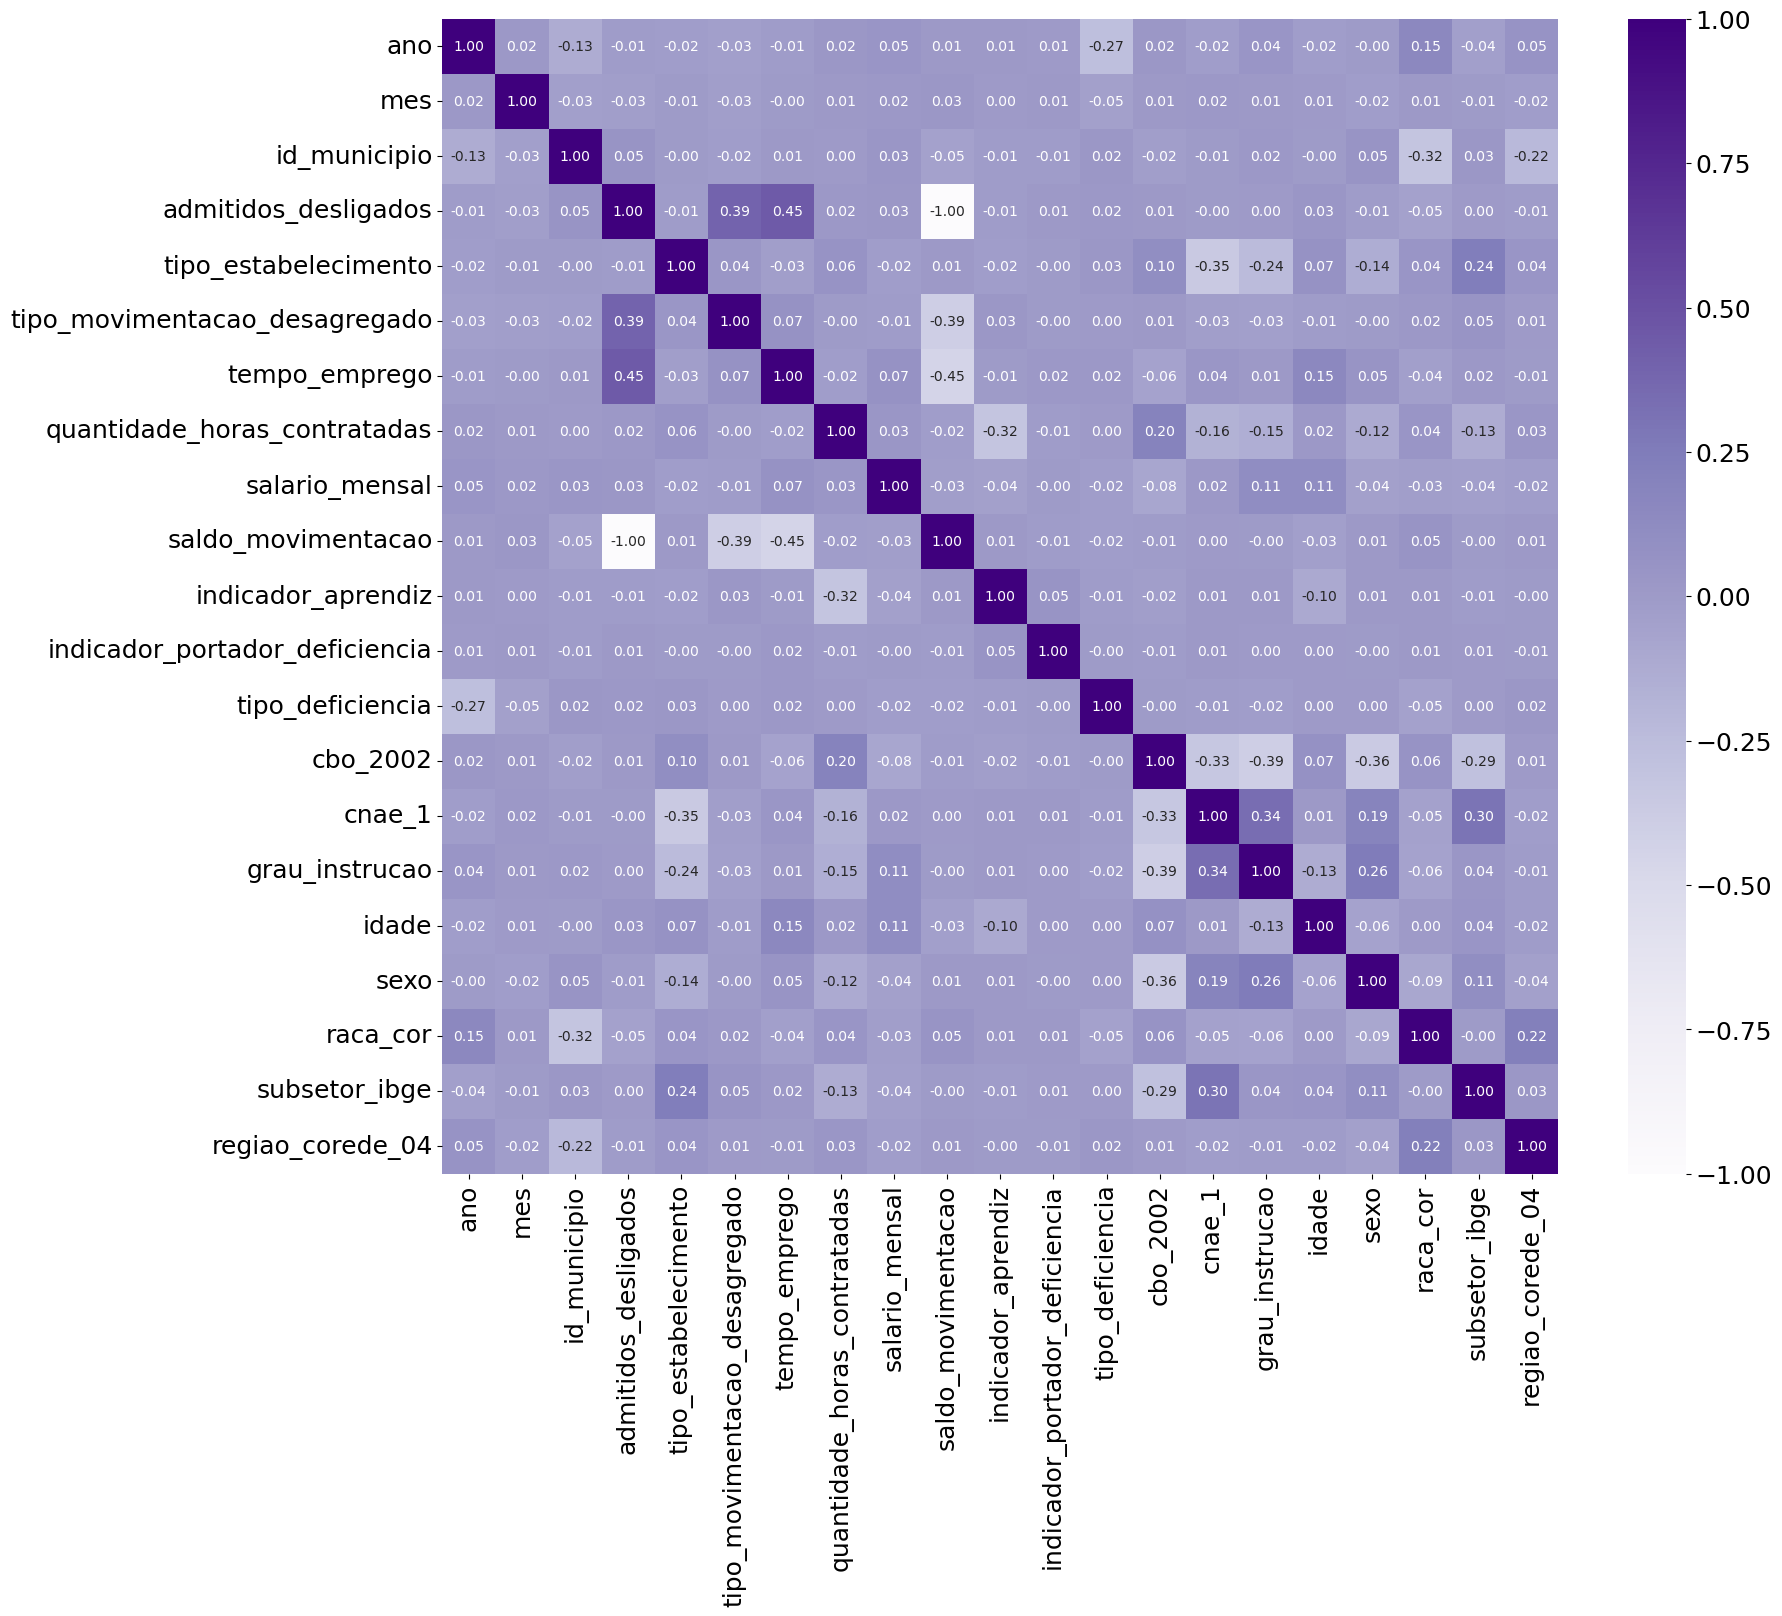

In [54]:
plt.figure(figsize=(18,15))
sns.heatmap(df_ajustes_corr.corr('pearson'),annot= True, fmt= '.2f', cmap='Purples')
plt.show()

## Models - 5/fev


- Usar somente o `caged_completo.csv`

In [60]:
df

0    14856
1      610
Name: sigla_uf_AL, dtype: int64

In [62]:
df.columns

Index(['ano', 'mes', 'id_municipio', 'admitidos_desligados',
       'tipo_estabelecimento', 'tipo_movimentacao_desagregado',
       'tempo_emprego', 'quantidade_horas_contratadas', 'salario_mensal',
       'saldo_movimentacao', 'indicador_aprendiz',
       'indicador_portador_deficiencia', 'tipo_deficiencia', 'cbo_2002',
       'cnae_1', 'cnae_2', 'cnae_2_subclasse', 'grau_instrucao', 'idade',
       'sexo', 'raca_cor', 'subsetor_ibge', 'regiao_corede_04', 'sigla_uf_AC',
       'sigla_uf_AL', 'sigla_uf_AM', 'sigla_uf_AP', 'sigla_uf_BA',
       'sigla_uf_CE', 'sigla_uf_DF', 'sigla_uf_ES', 'sigla_uf_GO',
       'sigla_uf_MA', 'sigla_uf_MG', 'sigla_uf_MS', 'sigla_uf_MT',
       'sigla_uf_PA', 'sigla_uf_PB', 'sigla_uf_PE', 'sigla_uf_PI',
       'sigla_uf_PR', 'sigla_uf_RJ', 'sigla_uf_RN', 'sigla_uf_RO',
       'sigla_uf_RR', 'sigla_uf_RS', 'sigla_uf_SC', 'sigla_uf_SE',
       'sigla_uf_SP', 'sigla_uf_TO'],
      dtype='object')

In [61]:
df

,ano,mes,id_municipio,admitidos_desligados,tipo_estabelecimento,tipo_movimentacao_desagregado,tempo_emprego,quantidade_horas_contratadas,salario_mensal,saldo_movimentacao,...,sigla_uf_PR,sigla_uf_RJ,sigla_uf_RN,sigla_uf_RO,sigla_uf_RR,sigla_uf_RS,sigla_uf_SC,sigla_uf_SE,sigla_uf_SP,sigla_uf_TO
0,2007,12,3535507,2,3,11,7.0,44,470.0,-1,...,0,0,0,0,0,0,0,0,1,0
1,2007,12,3539301,2,3,11,8.0,44,1218.0,-1,...,0,0,0,0,0,0,0,0,1,0
2,2007,12,3522703,1,3,2,0.0,44,470.0,1,...,0,0,0,0,0,0,0,0,1,0
3,2007,12,3506102,2,3,4,5.0,44,380.0,-1,...,0,0,0,0,0,0,0,0,1,0
4,2007,12,3506102,2,3,4,5.0,44,380.0,-1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15461,2011,6,5300108,1,1,2,0.0,44,862.0,1,...,0,0,0,0,0,0,0,0,0,0
15462,2011,6,5300108,2,1,6,4.0,44,862.0,-1,...,0,0,0,0,0,0,0,0,0,0
15463,2013,8,2103406,1,1,2,0.0,44,735.0,1,...,0,0,0,0,0,0,0,0,0,0
15464,2015,10,2101400,1,3,2,0.0,44,1100.0,1,...,0,0,0,0,0,0,0,0,0,0


In [70]:
# Create a list of binary columns
binary_cols = [col for col in df.columns if col.startswith("sigla_")]

# Create a dictionary to map the binary values to new values
value_map = {}
for i, col in enumerate(binary_cols):
    value_map[col] = i+1


In [76]:
value_map

{'sigla_uf_AC': 1,
 'sigla_uf_AL': 2,
 'sigla_uf_AM': 3,
 'sigla_uf_AP': 4,
 'sigla_uf_BA': 5,
 'sigla_uf_CE': 6,
 'sigla_uf_DF': 7,
 'sigla_uf_ES': 8,
 'sigla_uf_GO': 9,
 'sigla_uf_MA': 10,
 'sigla_uf_MG': 11,
 'sigla_uf_MS': 12,
 'sigla_uf_MT': 13,
 'sigla_uf_PA': 14,
 'sigla_uf_PB': 15,
 'sigla_uf_PE': 16,
 'sigla_uf_PI': 17,
 'sigla_uf_PR': 18,
 'sigla_uf_RJ': 19,
 'sigla_uf_RN': 20,
 'sigla_uf_RO': 21,
 'sigla_uf_RR': 22,
 'sigla_uf_RS': 23,
 'sigla_uf_SC': 24,
 'sigla_uf_SE': 25,
 'sigla_uf_SP': 26,
 'sigla_uf_TO': 27}

In [73]:
df['sigla_estado'] = df[binary_cols].apply(lambda x: sum([value_map[col] for col, val in x.iteritems() if val]), axis=1)

<ipython-input-73-879cfeede10d>:1: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  df['sigla_estado'] = df[binary_cols].apply(lambda x: sum([value_map[col] for col, val in x.iteritems() if val]), axis=1)


In [74]:
df = df.drop(binary_cols, axis=1)

In [84]:
df.iloc[:,5:]

,tipo_movimentacao_desagregado,tempo_emprego,quantidade_horas_contratadas,salario_mensal,saldo_movimentacao,indicador_aprendiz,indicador_portador_deficiencia,tipo_deficiencia,cbo_2002,cnae_1,cnae_2,cnae_2_subclasse,grau_instrucao,idade,sexo,raca_cor,subsetor_ibge,regiao_corede_04,sigla_estado
0,11,7.0,44,470.0,-1,0,0,NaN,621005,0,1130,0,5,29,1,2.0,25,99,26
1,11,8.0,44,1218.0,-1,0,0,NaN,622110,0,1130,0,3,33,1,2.0,25,99,26
2,2,0.0,44,470.0,1,0,0,NaN,621005,0,1334,0,4,31,1,2.0,25,99,26
3,4,5.0,44,380.0,-1,0,0,NaN,622505,0,1334,0,2,29,1,2.0,25,99,26
4,4,5.0,44,380.0,-1,0,0,NaN,622505,0,1334,0,2,35,1,2.0,25,99,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15461,2,0.0,44,862.0,1,0,0,0.0,715110,5,42111,6,4,23,1,8.0,15,99,7
15462,6,4.0,44,862.0,-1,0,0,0.0,411010,13,49302,17,7,23,1,8.0,20,99,7
15463,2,0.0,44,735.0,1,0,0,0.0,514320,3,10716,4,7,20,1,8.0,13,99,10
15464,2,0.0,44,1100.0,1,0,0,0.0,641010,17,1156,2,5,47,1,8.0,25,99,10


- arrumar tipo_deficiencia

In [87]:
df = df.drop(columns=['cbo_2002','regiao_corede_04'])

In [93]:
df['tipo_deficiencia'].fillna(0, inplace=True)

In [96]:
df.isna().sum()

ano                               0
mes                               0
id_municipio                      0
admitidos_desligados              0
tipo_estabelecimento              0
tipo_movimentacao_desagregado     0
tempo_emprego                     0
quantidade_horas_contratadas      0
salario_mensal                    0
saldo_movimentacao                0
indicador_aprendiz                0
indicador_portador_deficiencia    0
tipo_deficiencia                  0
cnae_1                            0
cnae_2                            0
cnae_2_subclasse                  0
grau_instrucao                    0
idade                             0
sexo                              0
raca_cor                          2
subsetor_ibge                     0
sigla_estado                      0
dtype: int64

In [98]:
df['raca_cor'].fillna(0, inplace=True)

In [103]:
df.ano.value_counts()

2013    2276
2012    2136
2011    1991
2014    1839
2010    1641
2008    1447
2009    1297
2007    1191
2015     766
2016     324
2017     211
2018     207
2019     140
Name: ano, dtype: int64

In [106]:
df.ano.dtype

dtype('int64')

In [122]:
df.ano

21       2012
22       2010
23       2010
24       2010
25       2010
         ... 
15459    2010
15460    2012
15461    2011
15462    2011
15463    2013
Name: ano, Length: 9883, dtype: int64

In [132]:
anos = [2010,2011,2012]
df = df.loc[df.ano.isin(anos)]#.ano.value_counts()

In [135]:
df.ano.value_counts()

2012    2136
2011    1991
2010    1641
Name: ano, dtype: int64

### Pegando dos anos de 2010, 2011 e 2012 da tabela microdados antigos - caged_completo

In [129]:
# df_2010 = pd.read_csv('anos_caged_completo/2010.csv')
# df_2011 = pd.read_csv('anos_caged_completo/2011.csv')
# df_2012 = pd.read_csv('anos_caged_completo/2012.csv')
# new_df = pd.concat([df_2010,df_2011,df_2012]).columns

# Prever salário

In [141]:
df.salario_mensal.describe()

count     5768.000000
mean       854.956137
std        745.639304
min          0.000000
25%        587.000000
50%        674.000000
75%        883.250000
max      18416.000000
Name: salario_mensal, dtype: float64

In [143]:
df.saldo_movimentacao.value_counts()

-1    2982
 1    2786
Name: saldo_movimentacao, dtype: int64

In [147]:
df.grau_instrucao.value_counts()

7    2658
5     720
6     623
4     595
2     391
9     283
3     249
8     177
1      72
Name: grau_instrucao, dtype: int64

In [148]:
df.dtypes

ano                                 int64
mes                                 int64
id_municipio                        int64
admitidos_desligados                int64
tipo_estabelecimento                int64
tipo_movimentacao_desagregado       int64
tempo_emprego                     float64
quantidade_horas_contratadas        int64
salario_mensal                    float64
saldo_movimentacao                  int64
indicador_aprendiz                  int64
indicador_portador_deficiencia      int64
tipo_deficiencia                  float64
cnae_1                              int64
cnae_2                              int64
cnae_2_subclasse                    int64
grau_instrucao                      int64
idade                               int64
sexo                                int64
raca_cor                          float64
subsetor_ibge                       int64
sigla_estado                        int64
dtype: object

## PARTE 3 - Prever grau de instrução do empregado/desempregado!!! Suficientemente variado comparado a outras variáveis como salario (sempre +- na mesma faixa )

In [1]:
import pandas as pd
from sklearn import *
import sklearn
from sklearn.preprocessing import *
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
df_2010 = pd.read_csv('anos_caged_completo/2010.csv')
df_2011 = pd.read_csv('anos_caged_completo/2011.csv')
df_2012 = pd.read_csv('anos_caged_completo/2012.csv')
new_df = pd.concat([df_2010,df_2011,df_2012])

In [3]:
new_df.shape

(46684, 41)

In [4]:
new_df.grau_instrucao.value_counts()

7    21330
5     5992
6     5092
4     4759
2     3206
9     2189
3     2173
8     1355
1      588
Name: grau_instrucao, dtype: int64

In [5]:
new_df.isna().sum()

ano                                    0
mes                                    0
sigla_uf                               0
id_municipio                           0
id_municipio_6                         0
admitidos_desligados                   0
tipo_estabelecimento                   0
tipo_movimentacao_desagregado          0
faixa_emprego_inicio_janeiro           0
tempo_emprego                          0
quantidade_horas_contratadas           0
salario_mensal                         0
saldo_movimentacao                     0
indicador_aprendiz                     0
indicador_trabalho_intermitente    46684
indicador_trabalho_parcial         46684
indicador_portador_deficiencia         0
tipo_deficiencia                       0
cbo_2002                               0
cnae_1                                 0
cnae_2                                 0
cnae_2_subclasse                       0
grau_instrucao                         0
idade                                  0
sexo            

In [6]:
# removendo colunas com muitos dados NaN
new_df.drop(['indicador_trabalho_intermitente', 'indicador_trabalho_parcial', 'bairros_sp',
    'bairros_fortaleza', 'bairros_rj', 'distritos_sp', 'regiao_administrativas_rj', 
    'regiao_corede', 'regiao_senai_pr'], axis='columns', inplace=True)

In [7]:
new_df

,ano,mes,sigla_uf,id_municipio,id_municipio_6,admitidos_desligados,tipo_estabelecimento,tipo_movimentacao_desagregado,faixa_emprego_inicio_janeiro,tempo_emprego,...,sexo,raca_cor,subsetor_ibge,regiao_administrativas_df,regiao_administrativas_sp,regiao_corede_04,regiao_gov_sp,regiao_senac_pr,regiao_senai_sp,subregiao_senai_pr
0,2010,7,RN,2408102,240810,2,1,4,2,6.0,...,2,8,16,0,999,99,999,99,999.0,99.0
1,2010,7,RN,2412203,241220,1,1,1,1,0.0,...,1,2,11,0,999,99,999,99,999.0,99.0
2,2010,7,RN,2408102,240810,1,1,2,5,0.0,...,1,2,21,0,999,99,999,99,999.0,99.0
3,2010,7,RN,2408102,240810,2,1,6,4,2.0,...,1,2,18,0,999,99,999,99,999.0,99.0
4,2010,7,RN,2408102,240810,2,1,4,5,49.0,...,2,8,21,0,999,99,999,99,999.0,99.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15494,2012,2,MA,2111300,211130,1,1,2,9,0.0,...,2,2,17,0,999,99,999,99,999.0,99.0
15495,2012,2,MA,2110005,211000,1,3,2,1,0.0,...,1,8,15,0,999,99,999,99,999.0,99.0
15496,2012,2,MA,2110005,211000,1,3,2,1,0.0,...,1,8,15,0,999,99,999,99,999.0,99.0
15497,2012,2,MA,2112001,211200,2,1,4,5,5.0,...,1,8,25,0,999,99,999,99,999.0,99.0


In [8]:
new_df = pd.get_dummies(data=new_df, columns=['sigla_uf'])

In [9]:
# Create a list of binary columns
binary_cols = [col for col in new_df.columns if col.startswith("sigla_")]

# Create a dictionary to map the binary values to new values
value_map = {}
for i, col in enumerate(binary_cols):
    value_map[col] = i+1


In [10]:
new_df['sigla_estado'] = new_df[binary_cols].apply(lambda x: sum([value_map[col] for col, val in x.iteritems() if val]), axis=1)

<ipython-input-10-d2e3cf3e0626>:1: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  new_df['sigla_estado'] = new_df[binary_cols].apply(lambda x: sum([value_map[col] for col, val in x.iteritems() if val]), axis=1)


In [11]:
new_df = new_df.drop(binary_cols, axis=1)

In [12]:
new_df = new_df.drop(columns=['cbo_2002','regiao_corede_04'])

In [13]:
new_df.columns

Index(['ano', 'mes', 'id_municipio', 'id_municipio_6', 'admitidos_desligados',
       'tipo_estabelecimento', 'tipo_movimentacao_desagregado',
       'faixa_emprego_inicio_janeiro', 'tempo_emprego',
       'quantidade_horas_contratadas', 'salario_mensal', 'saldo_movimentacao',
       'indicador_aprendiz', 'indicador_portador_deficiencia',
       'tipo_deficiencia', 'cnae_1', 'cnae_2', 'cnae_2_subclasse',
       'grau_instrucao', 'idade', 'sexo', 'raca_cor', 'subsetor_ibge',
       'regiao_administrativas_df', 'regiao_administrativas_sp',
       'regiao_gov_sp', 'regiao_senac_pr', 'regiao_senai_sp',
       'subregiao_senai_pr', 'sigla_estado'],
      dtype='object')

In [14]:
new_df = new_df.drop(columns=['id_municipio','id_municipio_6'])

In [15]:
new_df.columns

Index(['ano', 'mes', 'admitidos_desligados', 'tipo_estabelecimento',
       'tipo_movimentacao_desagregado', 'faixa_emprego_inicio_janeiro',
       'tempo_emprego', 'quantidade_horas_contratadas', 'salario_mensal',
       'saldo_movimentacao', 'indicador_aprendiz',
       'indicador_portador_deficiencia', 'tipo_deficiencia', 'cnae_1',
       'cnae_2', 'cnae_2_subclasse', 'grau_instrucao', 'idade', 'sexo',
       'raca_cor', 'subsetor_ibge', 'regiao_administrativas_df',
       'regiao_administrativas_sp', 'regiao_gov_sp', 'regiao_senac_pr',
       'regiao_senai_sp', 'subregiao_senai_pr', 'sigla_estado'],
      dtype='object')

In [16]:
new_df.regiao_senai_sp.value_counts()

999.0    45710
Name: regiao_senai_sp, dtype: int64

In [17]:
new_df

,ano,mes,admitidos_desligados,tipo_estabelecimento,tipo_movimentacao_desagregado,faixa_emprego_inicio_janeiro,tempo_emprego,quantidade_horas_contratadas,salario_mensal,saldo_movimentacao,...,sexo,raca_cor,subsetor_ibge,regiao_administrativas_df,regiao_administrativas_sp,regiao_gov_sp,regiao_senac_pr,regiao_senai_sp,subregiao_senai_pr,sigla_estado
0,2010,7,2,1,4,2,6.0,44,528.0,-1,...,2,8,16,0,999,999,99,999.0,99.0,14
1,2010,7,1,1,1,1,0.0,44,516.0,1,...,1,2,11,0,999,999,99,999.0,99.0,14
2,2010,7,1,1,2,5,0.0,44,697.0,1,...,1,2,21,0,999,999,99,999.0,99.0,14
3,2010,7,2,1,6,4,2.0,44,459.0,-1,...,1,2,18,0,999,999,99,999.0,99.0,14
4,2010,7,2,1,4,5,49.0,40,3610.0,-1,...,2,8,21,0,999,999,99,999.0,99.0,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15494,2012,2,1,1,2,9,0.0,44,1367.0,1,...,2,2,17,0,999,999,99,999.0,99.0,8
15495,2012,2,1,3,2,1,0.0,44,3303.0,1,...,1,8,15,0,999,999,99,999.0,99.0,8
15496,2012,2,1,3,2,1,0.0,44,646.0,1,...,1,8,15,0,999,999,99,999.0,99.0,8
15497,2012,2,2,1,4,5,5.0,44,710.0,-1,...,1,8,25,0,999,999,99,999.0,99.0,8


In [18]:
new_df = new_df.drop(columns=['regiao_administrativas_sp', 'regiao_gov_sp', 'regiao_senac_pr',
       'regiao_senai_sp', 'subregiao_senai_pr'])

In [19]:
new_df = new_df.drop(columns=['cnae_1','cnae_2_subclasse']) 

In [20]:
new_df.isna().sum()

ano                               0
mes                               0
admitidos_desligados              0
tipo_estabelecimento              0
tipo_movimentacao_desagregado     0
faixa_emprego_inicio_janeiro      0
tempo_emprego                     0
quantidade_horas_contratadas      0
salario_mensal                    0
saldo_movimentacao                0
indicador_aprendiz                0
indicador_portador_deficiencia    0
tipo_deficiencia                  0
cnae_2                            0
grau_instrucao                    0
idade                             0
sexo                              0
raca_cor                          0
subsetor_ibge                     0
regiao_administrativas_df         0
sigla_estado                      0
dtype: int64

In [21]:
new_df.raca_cor.value_counts()

8     26384
2     14479
9      3157
4      1897
6       434
1       332
99        1
Name: raca_cor, dtype: int64

In [22]:
new_df.columns

Index(['ano', 'mes', 'admitidos_desligados', 'tipo_estabelecimento',
       'tipo_movimentacao_desagregado', 'faixa_emprego_inicio_janeiro',
       'tempo_emprego', 'quantidade_horas_contratadas', 'salario_mensal',
       'saldo_movimentacao', 'indicador_aprendiz',
       'indicador_portador_deficiencia', 'tipo_deficiencia', 'cnae_2',
       'grau_instrucao', 'idade', 'sexo', 'raca_cor', 'subsetor_ibge',
       'regiao_administrativas_df', 'sigla_estado'],
      dtype='object')

In [23]:
new_df[['salario_mensal','tempo_emprego', 'grau_instrucao']].describe()

,salario_mensal,tempo_emprego,grau_instrucao
count,46684.000000,46684.000000,46684.000000
mean,838.388291,7.278082,5.846071
std,664.860840,19.682803,1.827594
min,0.000000,0.000000,1.000000
25%,583.000000,0.000000,5.000000
50%,668.000000,0.000000,7.000000
75%,865.000000,7.000000,7.000000
max,20242.000000,464.000000,9.000000


In [24]:
new_df.grau_instrucao.value_counts()

7    21330
5     5992
6     5092
4     4759
2     3206
9     2189
3     2173
8     1355
1      588
Name: grau_instrucao, dtype: int64

In [25]:
new_df.ano.value_counts()

2011    15594
2010    15591
2012    15499
Name: ano, dtype: int64

In [26]:
new_df.shape

(46684, 21)

## Models for multiclass prediction

In [27]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectFromModel, RFE

RANDOM_SEED = 38593 ## gerado aleatoriamente

In [28]:
X = new_df.drop(columns=['grau_instrucao'])
y = new_df.grau_instrucao

## Train Test and Validation split

In [29]:
# Train-validation and test split dataset
X, X_test, y, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

In [30]:
X.ano.value_counts()

2010    12520
2011    12478
2012    12349
Name: ano, dtype: int64

In [31]:
X_test.ano.value_counts()

2012    3150
2011    3116
2010    3071
Name: ano, dtype: int64

- Amostras de validação com cerca de 15% dos dados restantes para treino

In [159]:
val_cut = int(X.shape[0]*0.15) #com validação

# val_cut = 0 #sem validação

In [160]:
X_train = X.iloc[val_cut:,:]
X_val = X.iloc[:val_cut,:]

y_train = y.iloc[val_cut:]
y_val = y.iloc[:val_cut]

In [129]:
y_test

6813     7
13928    6
1757     7
925      7
4286     4
        ..
4712     5
14867    9
544      6
14544    5
12949    1
Name: grau_instrucao, Length: 9337, dtype: int64

In [34]:
print(
X_train.shape,
X_val.shape,
y_train.__len__(),
y_val.__len__()
)


(31745, 20) (5602, 20) 31745 5602


In [35]:
print(
X_train.ano.value_counts(),'\n\n\n', 
X_val.ano.value_counts(),
)


2010    10645
2011    10597
2012    10503
Name: ano, dtype: int64 


 2011    1881
2010    1875
2012    1846
Name: ano, dtype: int64


## Instancing Models

In [36]:
# Initialize the base models
models = [LogisticRegression(), KNeighborsClassifier(), SVC(), GaussianNB(), RandomForestClassifier(), GradientBoostingClassifier()]

# Define the parameters for the grid search
param_grid = [{'C': [0.01, 0.1, 1, 10], 'penalty': ['l1', 'l2']},
              {'n_neighbors': [3,5,7,9,11], 'weights': ['uniform', 'distance']},
              {'kernel': ['linear', 'rbf'], 'C': [0.01, 0.1, 1, 10]},
              {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]}, #talvez nem precise
              {'n_estimators': [10, 100, 1000], 'max_depth': [5, 7, 10, 15]},
              {'learning_rate': [0.1, 0.01, 0.001], 'n_estimators': [10, 100, 1000], 'max_depth': [1, 2, 3]}]

## LOGISTIC REGRESSION

In [44]:
model1 = LogisticRegression(max_iter=1000)
grid_search = GridSearchCV(model1, [{'C': [0.01, 0.1, 1, 10], 'penalty': ['l1', 'l2']}], cv=3, scoring='accuracy')
grid_search.fit(X_val, y_val)


/home/thiago/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/thiago/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=1000),
             param_grid=[{'C': [0.01, 0.1, 1, 10], 'penalty': ['l1', 'l2']}],
             scoring='accuracy')

In [46]:
grid_search.best_estimator_

LogisticRegression(C=10, max_iter=1000)

- LogisticRegression(C=10, max_iter=1000)

## SVC

In [45]:
# svc_X_val = X_val.iloc[:200,:]
# svc_y_val = y_val.iloc[:200]

In [46]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# svc_X_val_scaled = scaler.fit_transform(X_val)

In [49]:
model2 = SVC(max_iter=10000)
grid_search = GridSearchCV(model2, [{'kernel': ['linear', 'rbf'], 'C': [0.01, 0.1, 1, 10]}], cv=3, scoring='accuracy')
grid_search.fit(X_val, y_val)


/home/thiago/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/thiago/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/thiago/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/thiago/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/home/thiago/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: S

GridSearchCV(cv=3, estimator=SVC(max_iter=10000),
             param_grid=[{'C': [0.01, 0.1, 1, 10],
                          'kernel': ['linear', 'rbf']}],
             scoring='accuracy')

In [50]:
grid_search.best_estimator_

SVC(C=10, max_iter=10000)

- SVC(C=10, kernel='rbf', max_iter=1000)

## KNN

In [47]:
model2 = KNeighborsClassifier()
grid_search = GridSearchCV(model2, [{'n_neighbors': [3,5,7,9,11], 'weights': ['uniform', 'distance']}], cv=3, scoring='accuracy')
grid_search.fit(X_val, y_val)


GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [3, 5, 7, 9, 11],
                          'weights': ['uniform', 'distance']}],
             scoring='accuracy')

In [48]:
grid_search.best_estimator_

KNeighborsClassifier(n_neighbors=11, weights='distance')

- KNeighborsClassifier(n_neighbors=11, weights='distance')

## GaussianNB()

In [49]:
model4 = GaussianNB()
grid_search = GridSearchCV(model4, [{'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]}], cv=3, scoring='accuracy')
grid_search.fit(X_val, y_val)


GridSearchCV(cv=3, estimator=GaussianNB(),
             param_grid=[{'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06,
                                            1e-05]}],
             scoring='accuracy')

In [50]:
grid_search.best_estimator_

GaussianNB(var_smoothing=1e-07)

- GaussianNB(var_smoothing=1e-07)

## RandomForestClassifier()

In [51]:
model5 = RandomForestClassifier()
grid_search = GridSearchCV(model5, [{'n_estimators': [10, 100, 1000], 'max_depth': [5, 7, 10, 15]}], cv=3, scoring='accuracy')
grid_search.fit(X_val, y_val)


GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [5, 7, 10, 15],
                          'n_estimators': [10, 100, 1000]}],
             scoring='accuracy')

In [52]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=15, n_estimators=1000)

-RandomForestClassifier(max_depth=15, n_estimators=1000)

## GradientBoostingClassifier()

In [37]:
gb_X_val = X_val.iloc[:200,:]
gb_y_val = y_val.iloc[:200]

In [61]:
model5 = GradientBoostingClassifier()
grid_search = GridSearchCV(model5, [{'learning_rate': [0.1, 0.01, 0.001], 'n_estimators': [10, 100, 1000], 'max_depth': [1, 2, 3]}], cv=3, scoring='accuracy')
grid_search.fit(gb_X_val, gb_y_val)


/home/thiago/.local/lib/python3.10/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


GridSearchCV(cv=3, estimator=GradientBoostingClassifier(),
             param_grid=[{'learning_rate': [0.1, 0.01, 0.001],
                          'max_depth': [1, 2, 3],
                          'n_estimators': [10, 100, 1000]}],
             scoring='accuracy')

In [62]:
grid_search.best_estimator_

GradientBoostingClassifier(learning_rate=0.01, max_depth=2)

- GradientBoostingClassifier(learning_rate=0.01, max_depth=2)

## Base models optimized

In [161]:
best_models = [ LogisticRegression(C=10, max_iter=1000), 
                SVC(C=10, kernel='rbf', max_iter=1000),
                KNeighborsClassifier(n_neighbors=11, weights='distance'), 
                GaussianNB(var_smoothing=1e-07), 
                RandomForestClassifier(max_depth=15, n_estimators=1000), 
                GradientBoostingClassifier(learning_rate=0.01, max_depth=2)]

In [277]:
# # Perform grid search to find the best parameters for each model
# best_models = []
# for model, param in zip(models, param_grid):
#     grid_search = GridSearchCV(model, param, cv=3, scoring='accuracy')
#     grid_search.fit(X_train, y_train)
#     best_models.append(grid_search.best_estimator_)

In [121]:
# # Perform feature selection with SelectFromModel or RFE
# select_features_from_model = []

# for model in best_models:
#     # model.fit(X_train, y_train)
#     select = SelectFromModel(model) # or RFE(model, n_features_to_select=5)
#     X_train_new = select.transform(X_train) #Train
#     X_test_new = select.transform(X_test) #Test
#     X_val_new = select.transform(X_val) #Validation
#     select_features_from_model.append([X_train_new,X_test_new,X_val_new])


In [162]:
# Train the base models with the best parameters and selected features
for model in best_models:
    model.fit(X_train, y_train)

/home/thiago/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/thiago/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


In [163]:
# Make predictions with the base models
predictions = [{type(model).__name__ : model.predict(X_train)} for model in best_models]

In [164]:
predictions

[{'LogisticRegression': array([7, 7, 2, ..., 7, 7, 7])},
 {'SVC': array([5, 9, 2, ..., 5, 7, 2])},
 {'KNeighborsClassifier': array([5, 3, 8, ..., 7, 7, 7])},
 {'GaussianNB': array([7, 7, 2, ..., 7, 7, 7])},
 {'RandomForestClassifier': array([7, 7, 8, ..., 7, 7, 7])},
 {'GradientBoostingClassifier': array([7, 7, 7, ..., 7, 7, 7])}]

#### Juntando as previsões em um dataframe

In [165]:
df_predictions = pd.DataFrame()

for i in range(0,len(predictions)):
    for key in predictions[i].keys():
        df_predictions[key] = pd.DataFrame(predictions[i])


In [166]:
df_predictions

,LogisticRegression,SVC,KNeighborsClassifier,GaussianNB,RandomForestClassifier,GradientBoostingClassifier
0,7,5,5,7,7,7
1,7,9,3,7,7,7
2,2,2,8,2,8,7
3,7,7,2,7,7,7
4,7,7,7,7,7,7
...,...,...,...,...,...,...
31740,7,7,6,7,6,7
31741,7,7,7,7,7,7
31742,7,5,7,7,7,7
31743,7,7,7,7,7,7


In [167]:
for column in df_predictions.columns:
    print('\n\n'+column)
    print(df_predictions[column].value_counts())



LogisticRegression
7    30062
2     1284
9      373
1       26
Name: LogisticRegression, dtype: int64


SVC
7    18654
9     5970
2     4137
5     2066
4      907
6       11
Name: SVC, dtype: int64


KNeighborsClassifier
7    14528
5     4093
6     3456
4     3178
2     2199
9     1500
3     1487
8      890
1      414
Name: KNeighborsClassifier, dtype: int64


GaussianNB
7    27372
2     2455
9     1144
3      345
6      298
4       46
8       41
1       26
5       18
Name: GaussianNB, dtype: int64


RandomForestClassifier
7    23141
5     2246
2     1798
4     1608
9     1010
6      915
3      611
8      230
1      186
Name: RandomForestClassifier, dtype: int64


GradientBoostingClassifier
7    30466
2      614
9      404
6      261
Name: GradientBoostingClassifier, dtype: int64


## Otimizando o meta-modelo com dados de validação

In [156]:
meta_model = LogisticRegression(max_iter=1000)
grid_search = GridSearchCV(meta_model, [{'C': [0.01, 0.1, 1, 10], 'penalty': ['l1', 'l2']}], cv=3, scoring='accuracy')
grid_search.fit(X_val, y_val)


/home/thiago/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/thiago/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

KeyboardInterrupt: 

In [155]:
grid_search.best_estimator_

LogisticRegression(C=0.01, max_iter=1000)

## Treinando o meta-modelo

In [168]:
# Training the meta-model
meta_model = LogisticRegression(C=0.01, max_iter=1000)
meta_model.fit(df_predictions, y_train)


/home/thiago/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=0.01, max_iter=1000)

## Fazendo a previsão final usando os dados de teste

In [170]:
final_predictions = [{type(model).__name__ : model.predict(X_test)} for model in best_models]

In [171]:
final_predictions

[{'LogisticRegression': array([7, 7, 7, ..., 7, 7, 7])},
 {'SVC': array([7, 7, 7, ..., 7, 7, 7])},
 {'KNeighborsClassifier': array([5, 7, 9, ..., 7, 7, 4])},
 {'GaussianNB': array([7, 7, 7, ..., 7, 7, 7])},
 {'RandomForestClassifier': array([7, 7, 7, ..., 7, 7, 7])},
 {'GradientBoostingClassifier': array([7, 7, 7, ..., 7, 7, 7])}]

In [172]:
df_final_predictions = pd.DataFrame()

for i in range(0,len(final_predictions)):
    for key in final_predictions[i].keys():
        df_final_predictions[key] = pd.DataFrame(final_predictions[i])


In [173]:
df_final_predictions

,LogisticRegression,SVC,KNeighborsClassifier,GaussianNB,RandomForestClassifier,GradientBoostingClassifier
0,7,7,5,7,7,7
1,7,7,7,7,7,7
2,7,7,9,7,7,7
3,7,7,7,7,7,7
4,7,2,4,7,7,7
...,...,...,...,...,...,...
9332,7,2,7,7,7,7
9333,7,7,7,7,7,7
9334,7,7,7,7,7,7
9335,7,7,7,7,7,7


## Performance dos modelos do stacking

In [183]:
accuracy = accuracy_score(y_test, np.array(df_final_predictions.LogisticRegression))
print(f'Ensemble accuracy: {accuracy:.4f}')

Ensemble accuracy: 0.4702


In [184]:
accuracy = accuracy_score(y_test, np.array(df_final_predictions.SVC))
print(f'Ensemble accuracy: {accuracy:.4f}')

Ensemble accuracy: 0.3617


In [185]:
accuracy = accuracy_score(y_test, np.array(df_final_predictions.KNeighborsClassifier))
print(f'Ensemble accuracy: {accuracy:.4f}')

Ensemble accuracy: 0.4585


In [186]:
accuracy = accuracy_score(y_test, np.array(df_final_predictions.GaussianNB))
print(f'Ensemble accuracy: {accuracy:.4f}')

Ensemble accuracy: 0.4719


In [187]:
accuracy = accuracy_score(y_test, np.array(df_final_predictions.RandomForestClassifier))
print(f'Ensemble accuracy: {accuracy:.4f}')

Ensemble accuracy: 0.5088


In [188]:
accuracy = accuracy_score(y_test, np.array(df_final_predictions.GradientBoostingClassifier))
print(f'Ensemble accuracy: {accuracy:.4f}')

Ensemble accuracy: 0.4786


## Performance do meta-modelo [FINAL]

In [ ]:
# Make predictions with the meta-model using th
final_predictions_meta = meta_model.predict(df_final_predictions)

In [175]:
# Evaluate the performance of the ensemble
accuracy = accuracy_score(y_test, final_predictions_meta)
print(f'Ensemble accuracy: {accuracy:.4f}')

Ensemble accuracy: 0.4708


In [189]:
y_test.value_counts()

7    4264
5    1141
6    1038
4     977
2     677
9     425
3     403
8     284
1     128
Name: grau_instrucao, dtype: int64

In [192]:
len(y_test)
4264/9337 

0.45667773374745635

- um modelo que chutasse tudo 7 (grau de instrução mais abundante) acertava 4264/9337=0.456, muito próximo da média de acertos dos modelos

- Já é por natureza um problema que deveria ser abordado via séries temporais, já que estamos tratando de uma amostra de cadastros ao longo de 3 anos. Essa abordagem em si já é uma simplificação

In [197]:
from sklearn.metrics import confusion_matrix

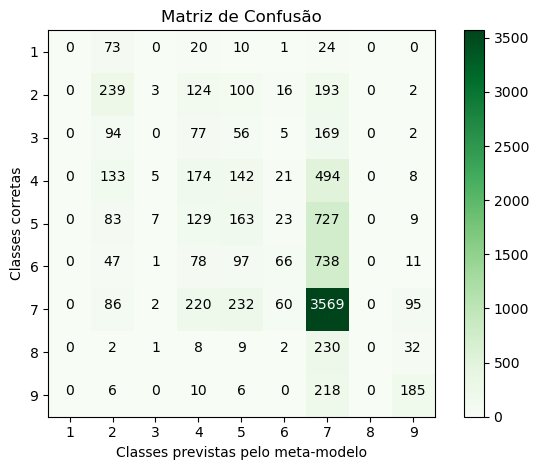

In [205]:
cm = confusion_matrix(y_test, final_predictions_meta)

# Plot the confusion matrix using matplotlib
plt.imshow(cm, cmap=plt.cm.Greens)
plt.xlabel("Classes previstas pelo meta-modelo")
plt.ylabel("Classes corretas")
plt.title("Matriz de Confusão")
plt.colorbar()

tick_marks = np.arange(len(np.unique(y_test)))
plt.xticks(tick_marks, np.unique(y_test))
plt.yticks(tick_marks, np.unique(y_test))

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], "d"),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > cm.max() / 2. else "black")

plt.tight_layout()
plt.show()

In [201]:
y_test.value_counts()

7    4264
5    1141
6    1038
4     977
2     677
9     425
3     403
8     284
1     128
Name: grau_instrucao, dtype: int64

/home/thiago/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


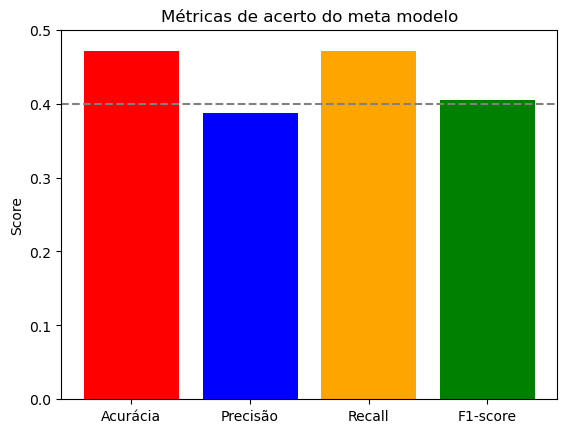

In [220]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Compute accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, final_predictions_meta)
precision = precision_score(y_test, final_predictions_meta, average='weighted')
recall = recall_score(y_test, final_predictions_meta, average='weighted')
f1 = f1_score(y_test, final_predictions_meta, average='weighted')

# Plot the results using matplotlib
metrics = [accuracy, precision, recall, f1]
metric_names = ["Acurácia", "Precisão", "Recall", "F1-score"]

fig, ax = plt.subplots()

ax.axhline(y=0.4, color='gray', linestyle='--')

colors = ['red', 'blue', 'orange', 'green']
ax.bar(metric_names, metrics, color=colors)
ax.set_ylim([0, 0.5])
ax.set_ylabel("Score")
ax.set_title("Métricas de acerto do meta modelo")

plt.show()

In [222]:
print(accuracy ,
precision,
recall,
f1 )

0.4708150369497697 0.3873175836663041 0.4708150369497697 0.4050603935914574


In [230]:
[best_models[0],best_models[4]]

LogisticRegression(C=10, max_iter=1000)

In [231]:
best_models[4]

RandomForestClassifier(max_depth=15, n_estimators=1000)

/home/thiago/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/thiago/.local/lib/python3.10/site-packages/yellowbrick/model_selection/importances.py:194: YellowbrickWarning: detected multi-dimensional feature importances but stack=False, using mean to aggregate them.
  warnings.warn(


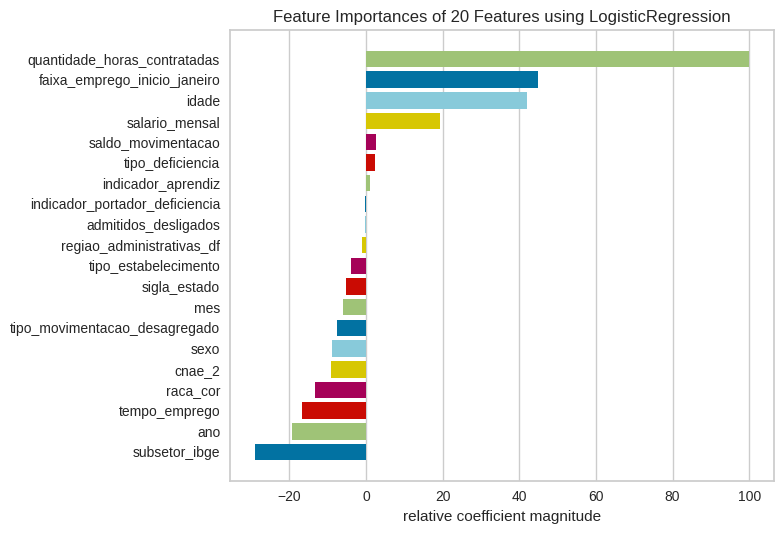

/home/thiago/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


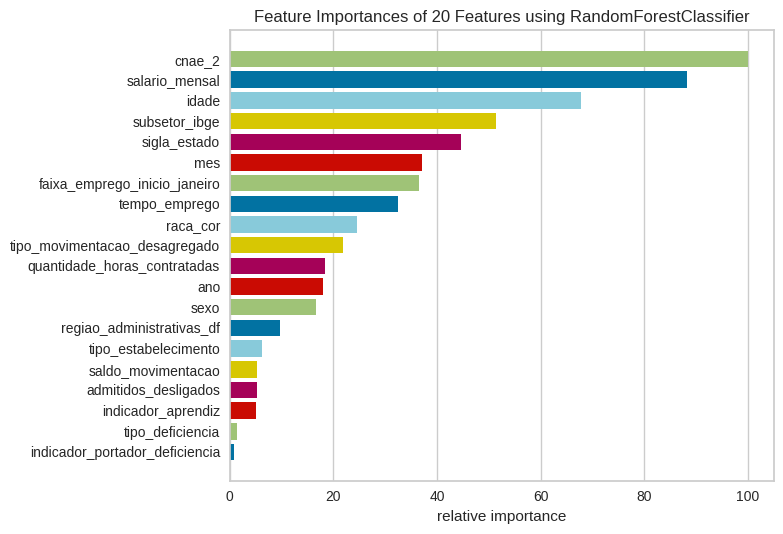

In [232]:
# Import model and visualizer
from yellowbrick.model_selection import FeatureImportances
from sklearn.ensemble import RandomForestClassifier
# Instantiate model and visualizer

for model in [best_models[0],best_models[4]]:
    visualizer = FeatureImportances(model)
    # Fit and display visualizer
    visualizer.fit(X_train, y_train)
    visualizer.show();

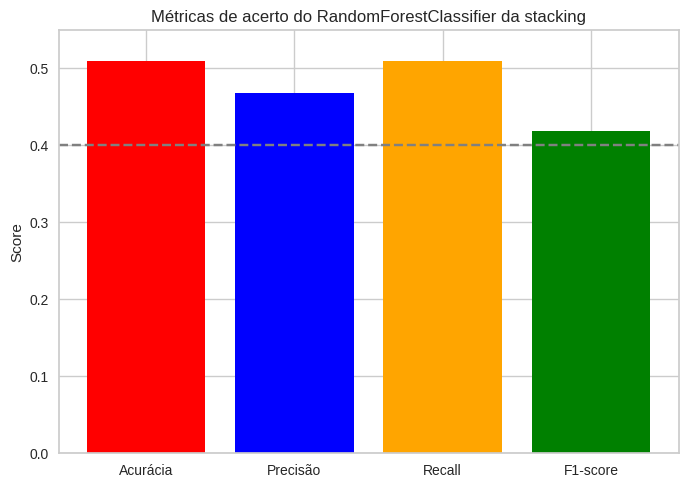

In [240]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Compute accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, np.array(df_final_predictions.RandomForestClassifier))
precision = precision_score(y_test, np.array(df_final_predictions.RandomForestClassifier), average='weighted')
recall = recall_score(y_test, np.array(df_final_predictions.RandomForestClassifier), average='weighted')
f1 = f1_score(y_test, np.array(df_final_predictions.RandomForestClassifier), average='weighted')

# Plot the results using matplotlib
metrics = [accuracy, precision, recall, f1]
metric_names = ["Acurácia", "Precisão", "Recall", "F1-score"]

fig, ax = plt.subplots()

ax.axhline(y=0.4, color='gray', linestyle='--')

colors = ['red', 'blue', 'orange', 'green']
ax.bar(metric_names, metrics, color=colors)
ax.set_ylim([0, 0.55])
ax.set_ylabel("Score")
ax.set_title("Métricas de acerto do RandomForestClassifier da stacking")

plt.show()